# Hyperparameter Optimization (HPO) of Machine Learning Models

### **Sample code for classification problems**  
**Dataset used:**  
&nbsp; MNIST from sklearn

**Machine learning algorithms used:**  
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE), particle swarm optimization (PSO), genetic algorithm (GA).

**Performance metric:**  
&nbsp; Classification accuracy

In [1]:
import os

def install_packages(packages):
    for package in packages:
        !pip install -q {package}

packages_to_install = [
    "tensorflow~=2.11",
    "scikeras",
    "keras",
    "seaborn",
    "Optunity",
    "sklearn-deap",
    "colorama",
    "scikit-optimize",
    "hyperopt",
    "tpot",
    "ipykernel",
    "jupyter",
    "scikeras[tensorflow]",
    "scikeras[tensorflow-cpu]"
]

install_packages(packages_to_install)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import time
import optunity
import optunity.metrics
import keras
import sys
from tpot import TPOTClassifier
from random import randint
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,make_scorer, recall_score, f1_score, precision_score, log_loss
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from joblib import parallel_backend
from sklearn import datasets
from random import randrange as sp_randrange
from scipy.stats import randint as sp_randint
from pandas import read_csv
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler

## Load MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

You can read more about the data and the variables [[1]](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits/).

In [3]:
d = datasets.load_digits()
X = d.data
y = d.target
d
print("Training X Data Shape:", X.shape)
print("Training y DataShape:", y.shape)

Training X Data Shape: (1797, 64)
Training y DataShape: (1797,)


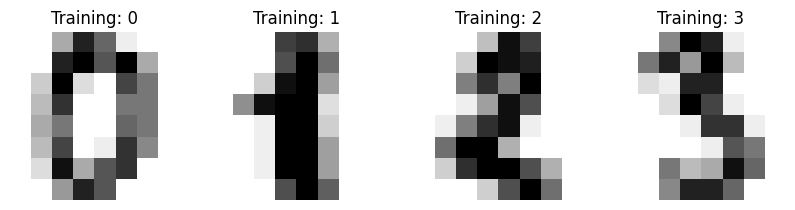

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, d.images, d.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

**Preprocessing**

In [5]:
import pandas as pd
from sklearn.datasets import load_digits

# Caricamento del dataset
digits = load_digits()
df = pd.DataFrame(digits.data, columns=[f'pixel_{i//8}_{i%8}' for i in range(digits.data.shape[1])])
df['target'] = digits.target

# Verifica dei valori NaN nel dataset
nan_summary = df.isna().sum()

print("Conteggio di valori NaN per colonna:")
print(nan_summary)

# Filtraggio delle colonne con valori NaN
nan_columns = nan_summary[nan_summary > 0].index
print("\nColonne con valori NaN:")
print(nan_columns)

Conteggio di valori NaN per colonna:
pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

Colonne con valori NaN:
Index([], dtype='object')


In [6]:
from collections import Counter
y_values = y

# Definizione dei nomi delle classi
class_names = {i: f"Cifra {i}" for i in range(10)}

class_counts = Counter(y_values)
total_samples = len(y_values)

print("Analisi del bilancio delle classi per il dataset MNIST:")
print("-----------------------------------------------------")
for class_label, count in sorted(class_counts.items()):
    percentage = (count / total_samples) * 100
    class_name = class_names[class_label]
    print(f"Classe {class_label} ({class_name}): {count} campioni ({percentage:.2f}%)")

print(f"\nCampioni totali: {total_samples}")

# Rapporto di sbilanciamento
if len(class_counts) > 1:
    minority_class = min(class_counts, key=class_counts.get)
    majority_class = max(class_counts, key=class_counts.get)
    imbalance_ratio = class_counts[majority_class] / class_counts[minority_class]
    print(f"\nRapporto di sbilanciamento ({class_names[majority_class]}:{class_names[minority_class]}): {imbalance_ratio:.2f}:1")

Analisi del bilancio delle classi per il dataset MNIST:
-----------------------------------------------------
Classe 0 (Cifra 0): 178 campioni (9.91%)
Classe 1 (Cifra 1): 182 campioni (10.13%)
Classe 2 (Cifra 2): 177 campioni (9.85%)
Classe 3 (Cifra 3): 183 campioni (10.18%)
Classe 4 (Cifra 4): 181 campioni (10.07%)
Classe 5 (Cifra 5): 182 campioni (10.13%)
Classe 6 (Cifra 6): 181 campioni (10.07%)
Classe 7 (Cifra 7): 179 campioni (9.96%)
Classe 8 (Cifra 8): 174 campioni (9.68%)
Classe 9 (Cifra 9): 180 campioni (10.02%)

Campioni totali: 1797

Rapporto di sbilanciamento (Cifra 3:Cifra 8): 1.05:1


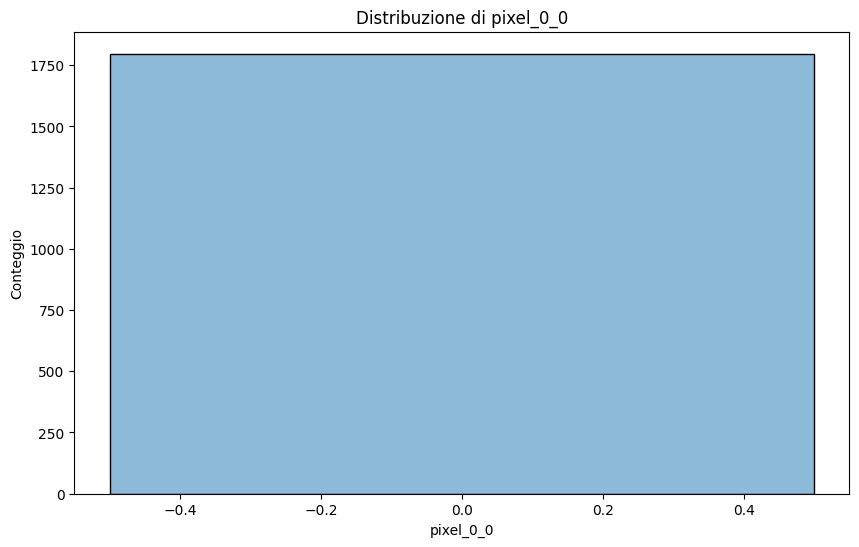

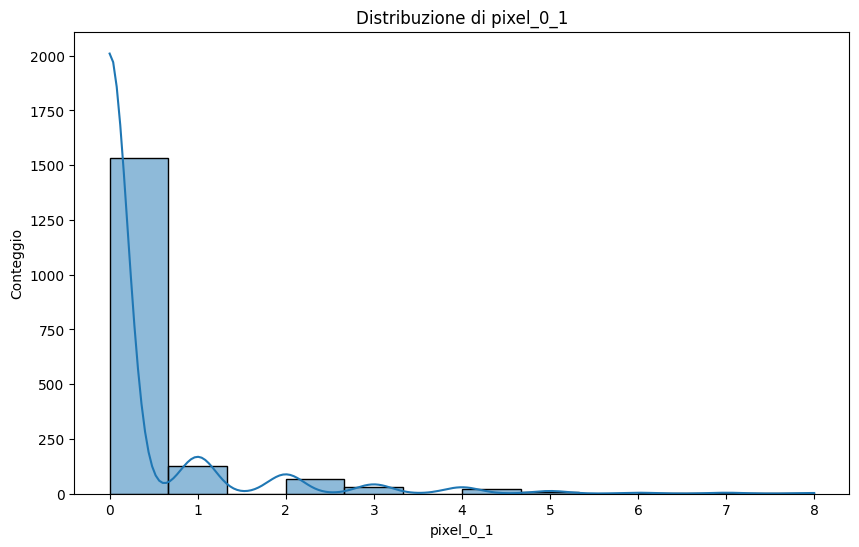

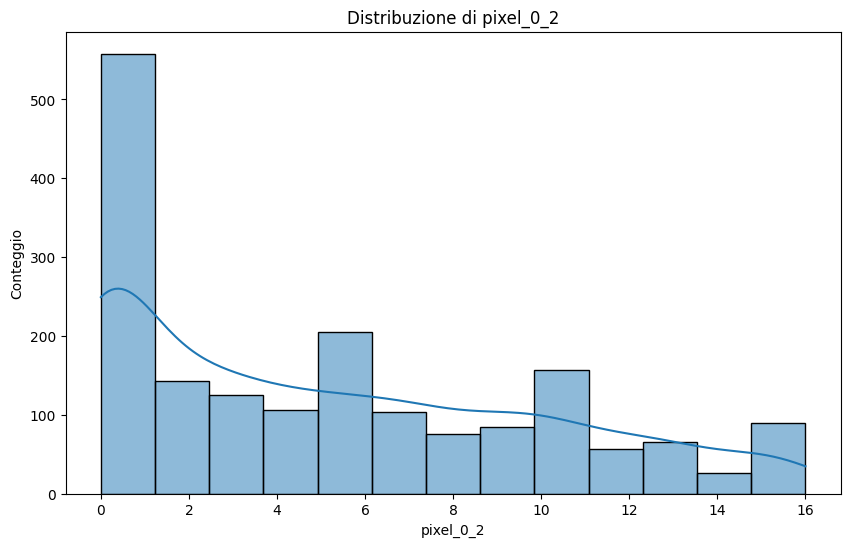

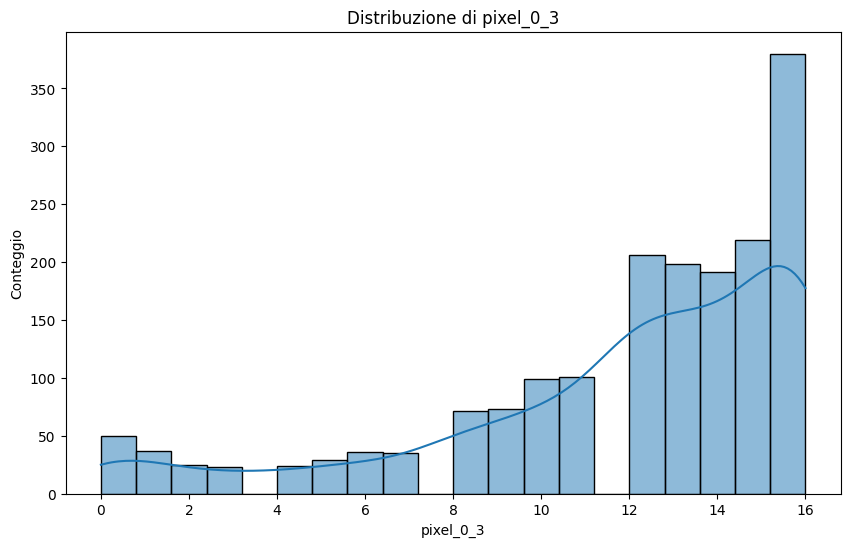

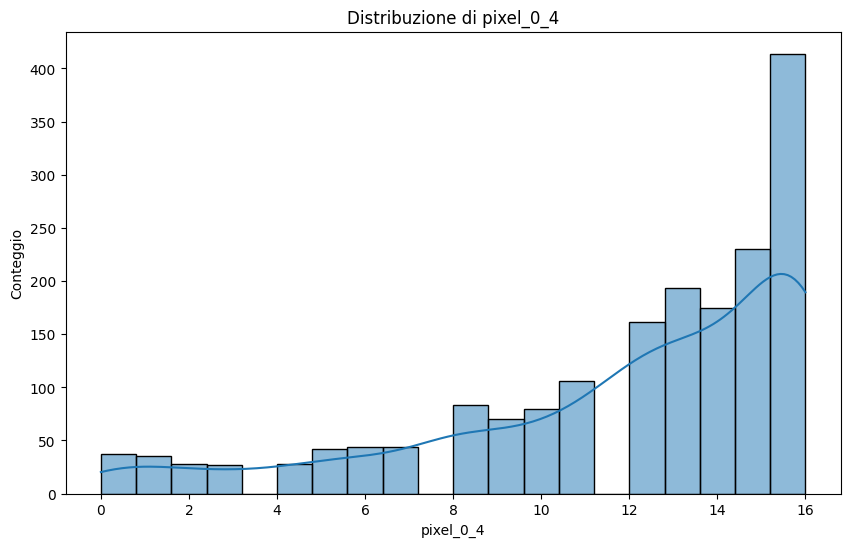

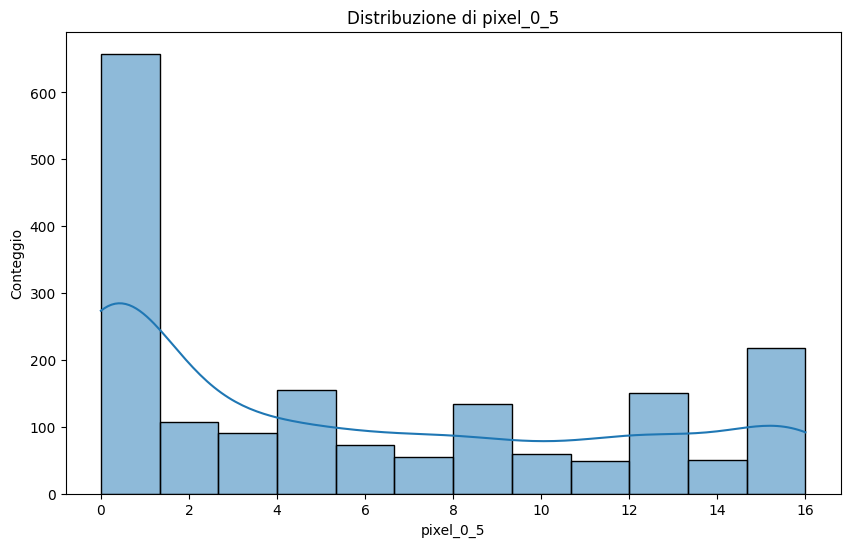

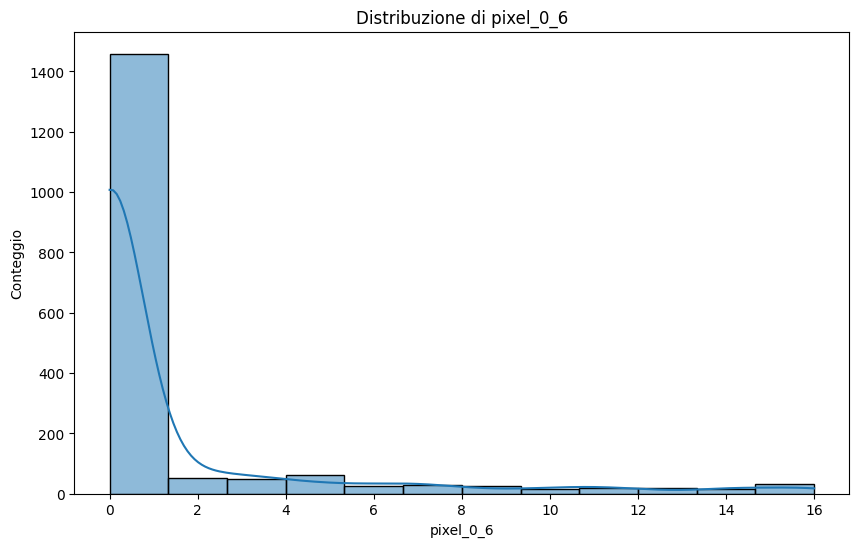

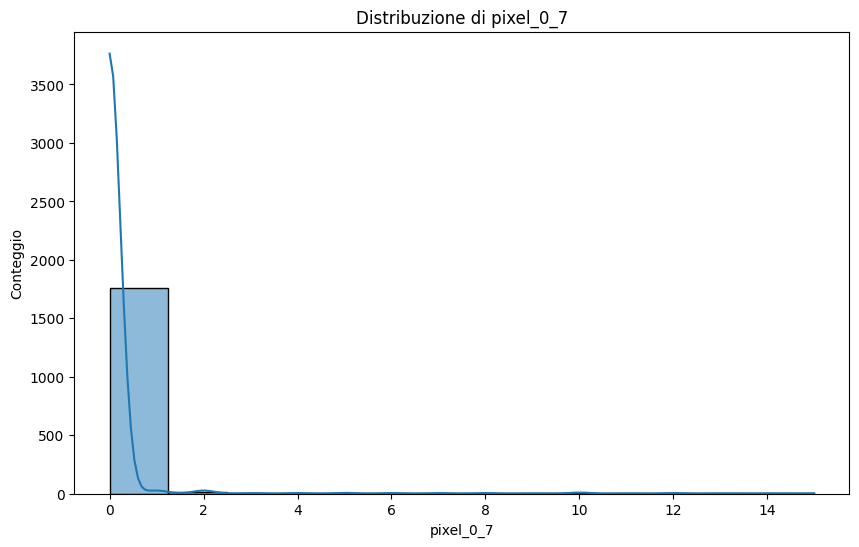

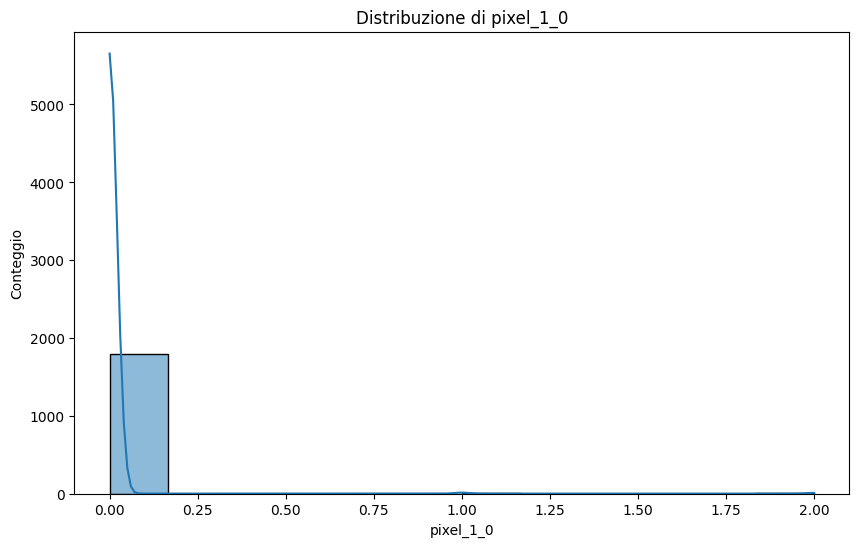

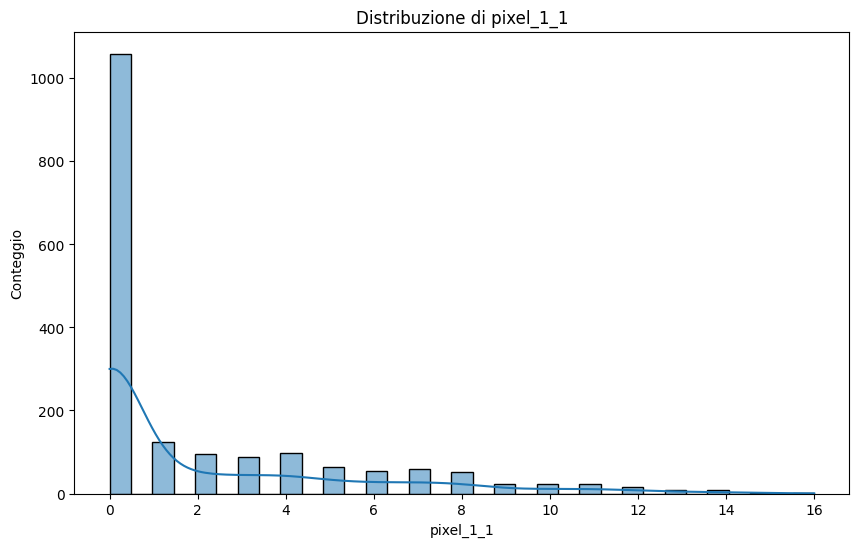

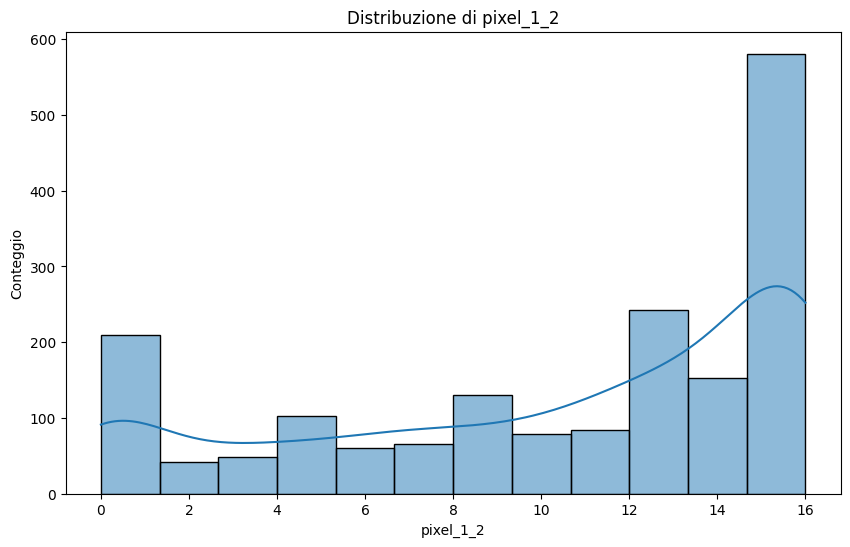

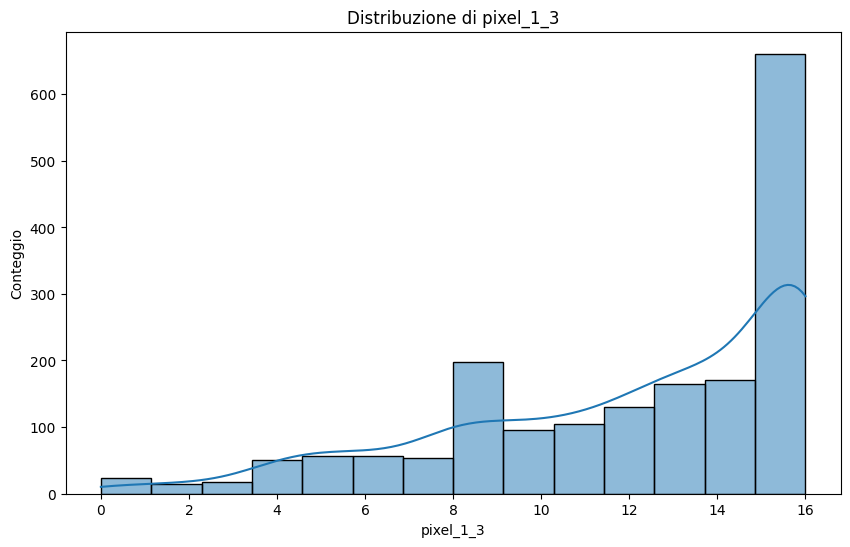

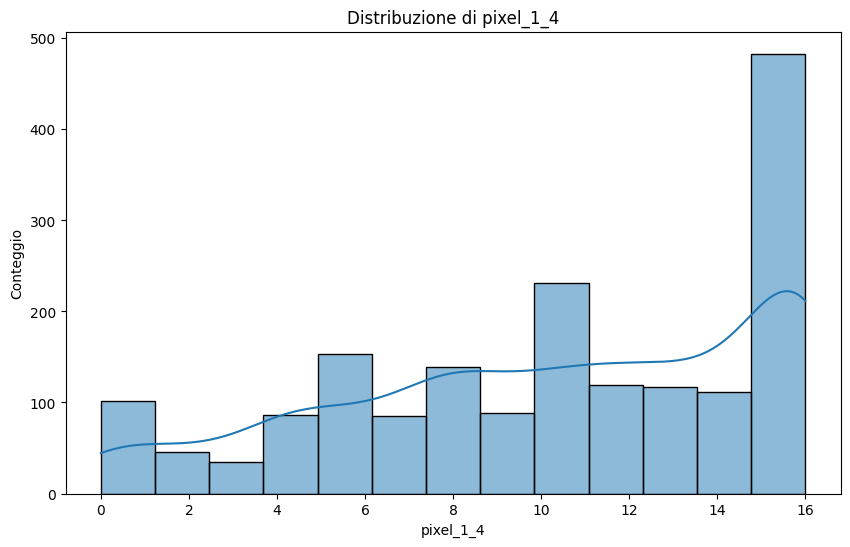

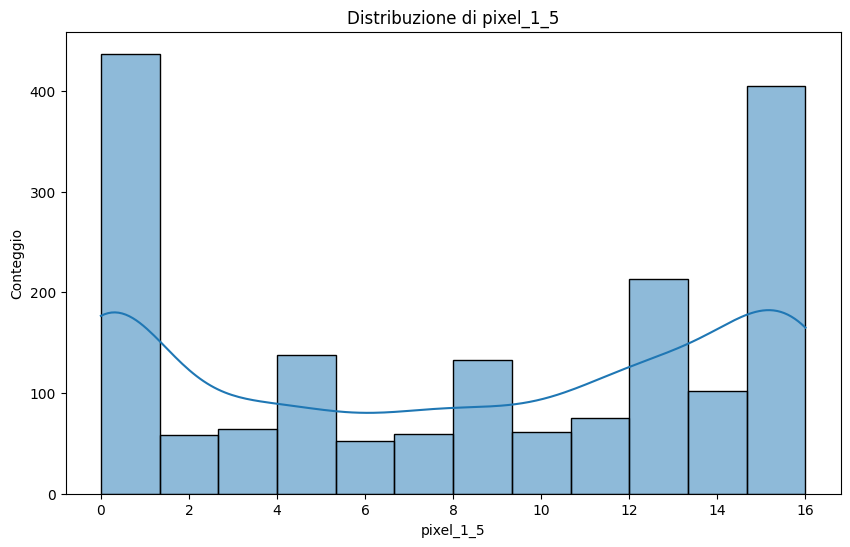

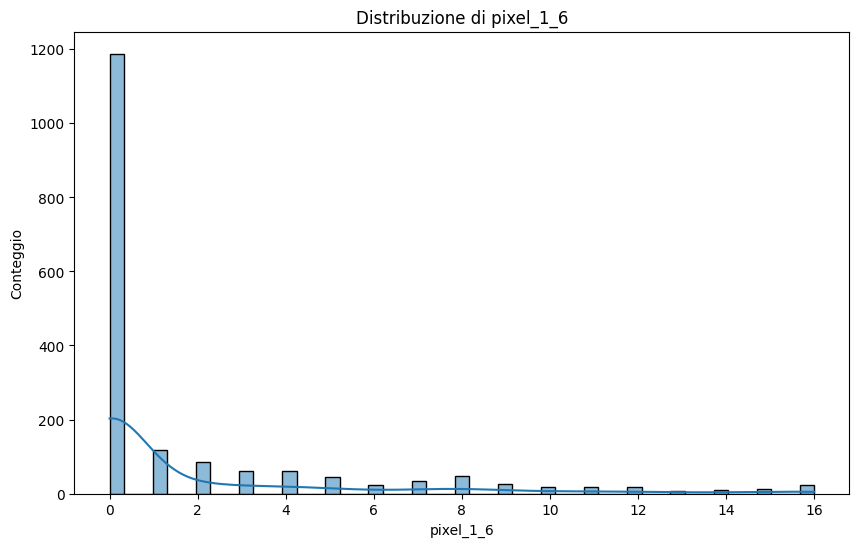

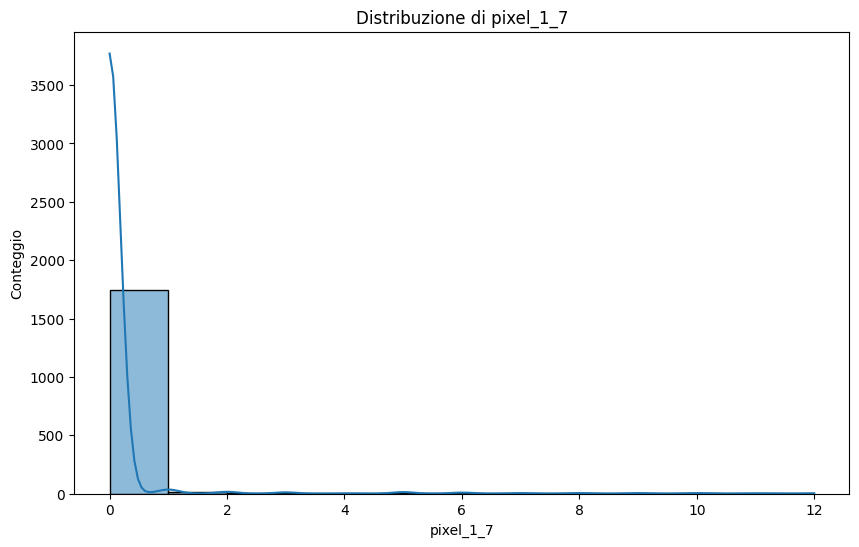

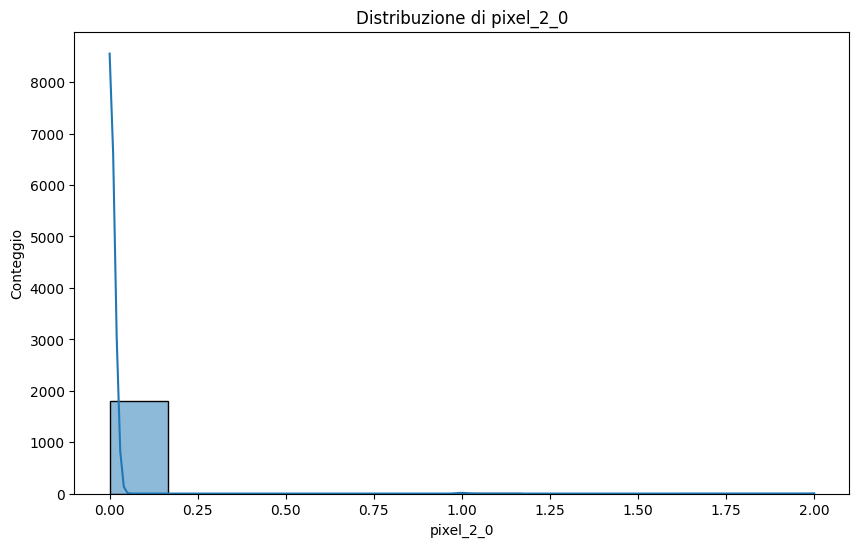

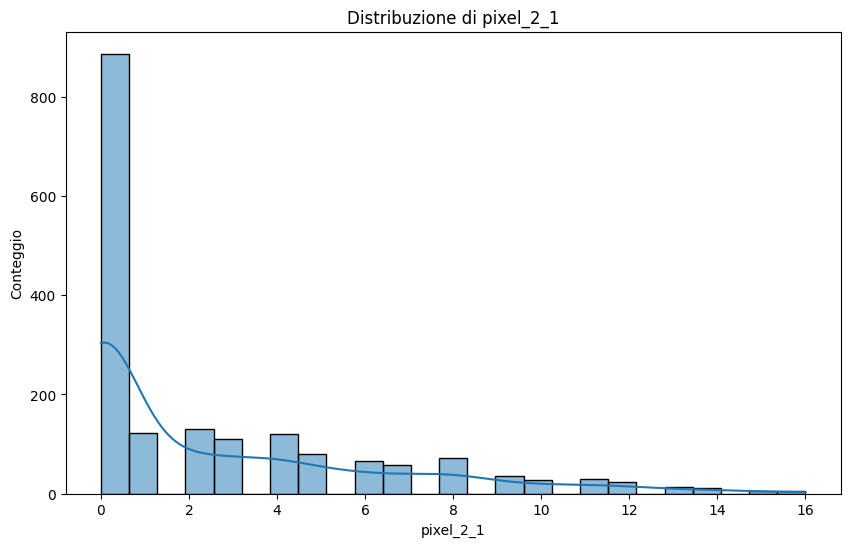

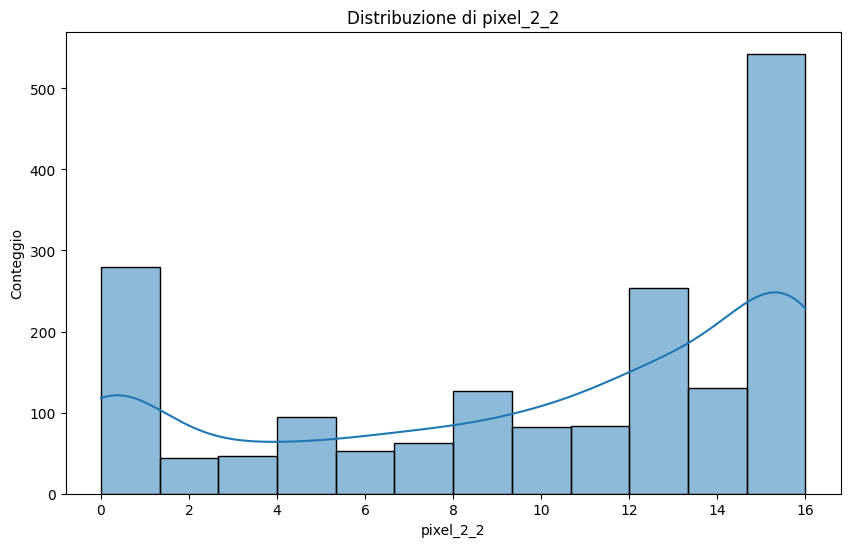

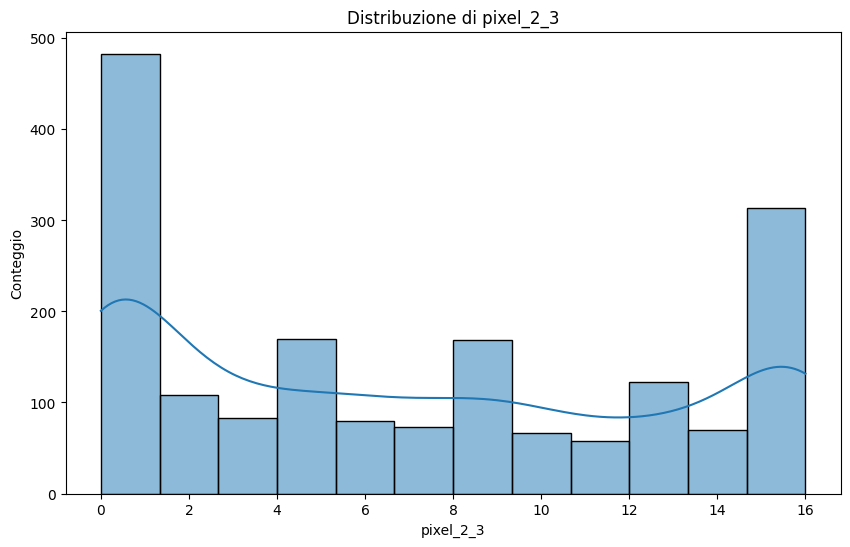

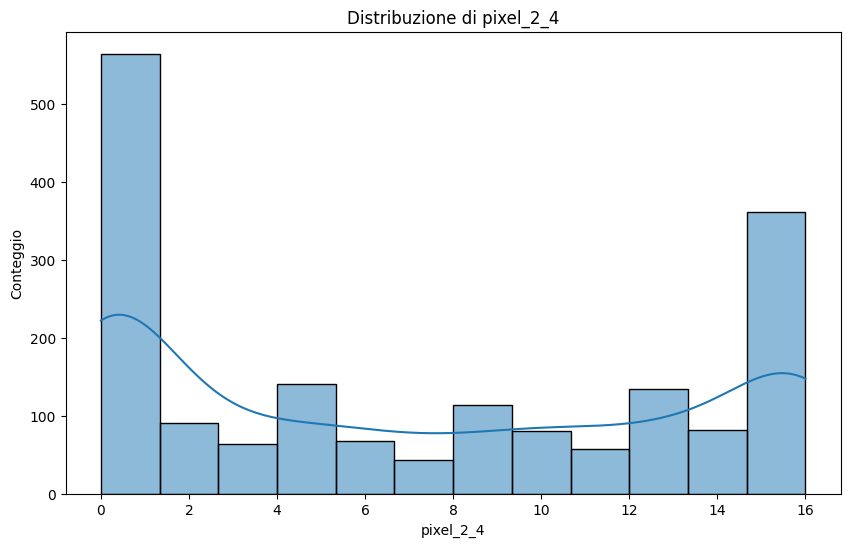

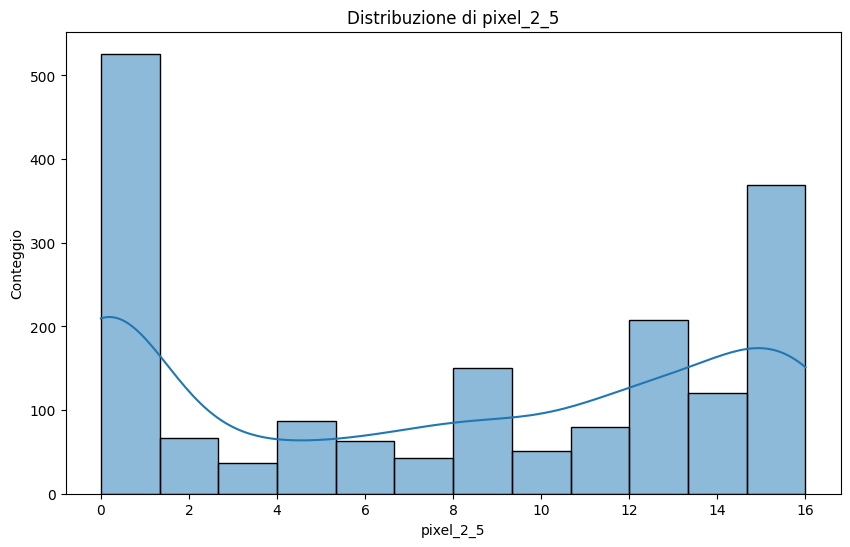

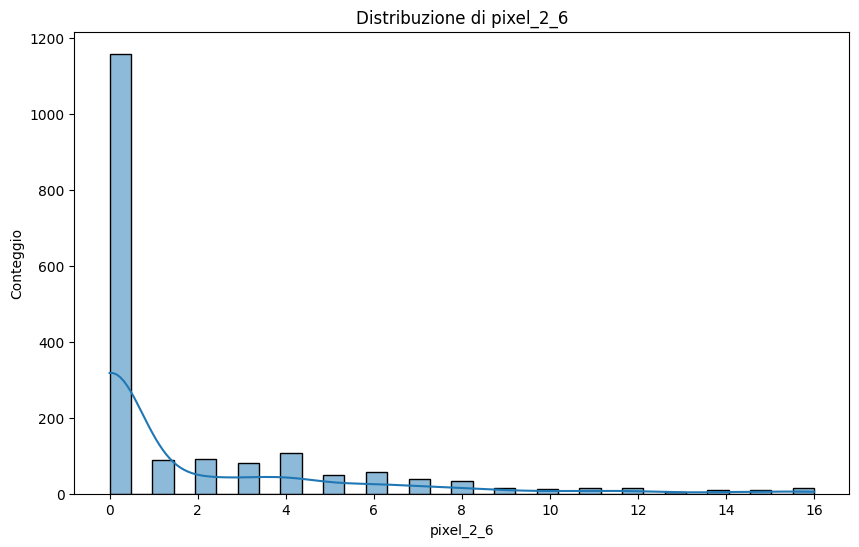

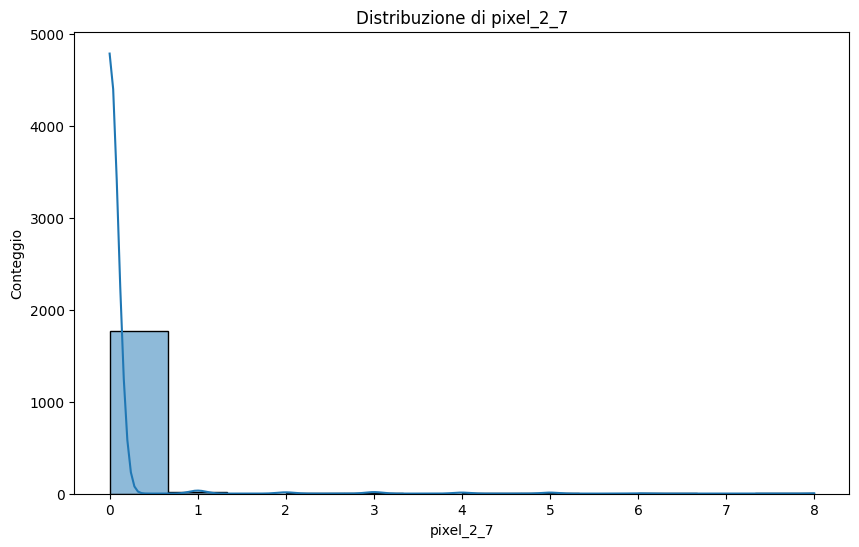

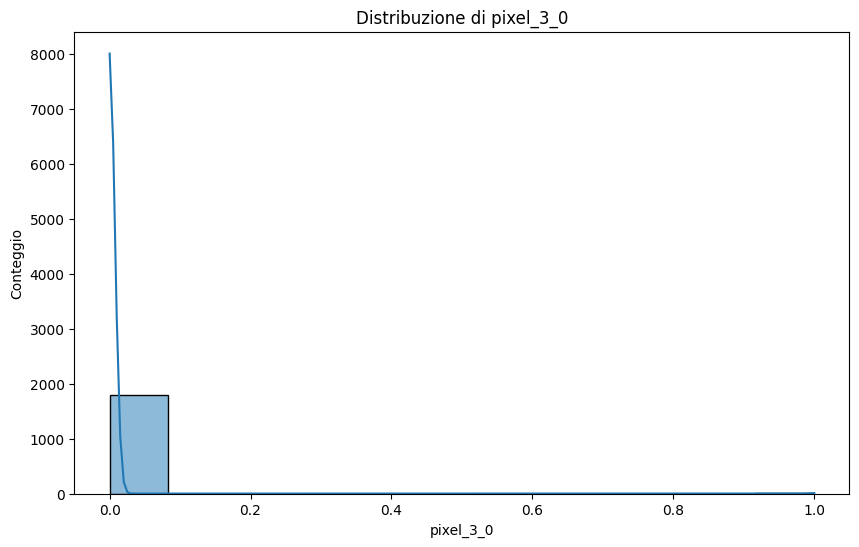

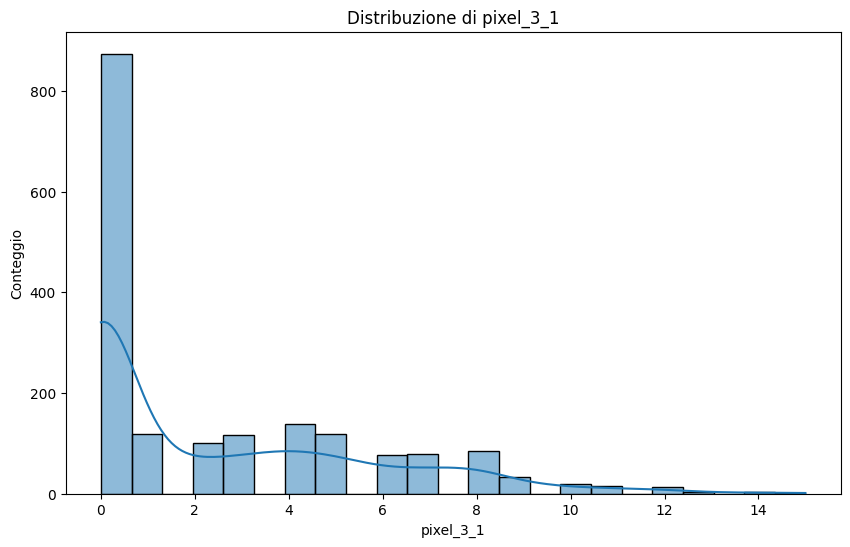

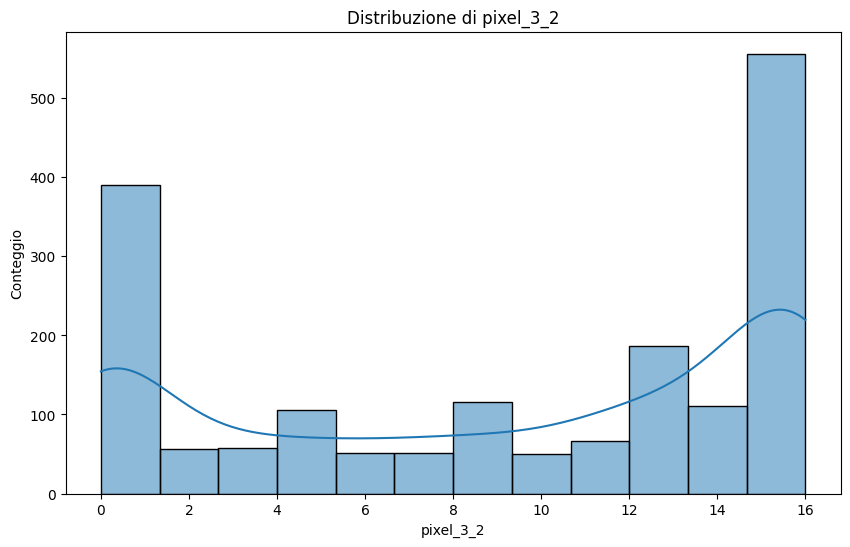

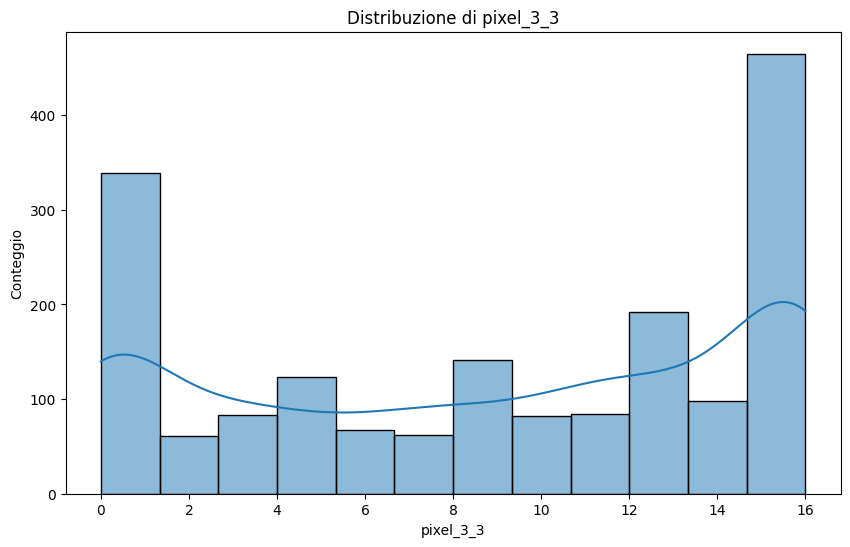

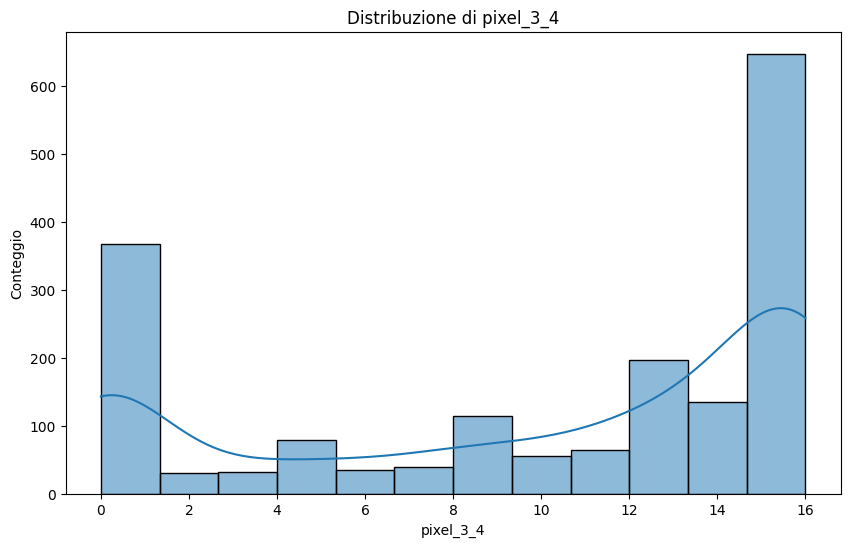

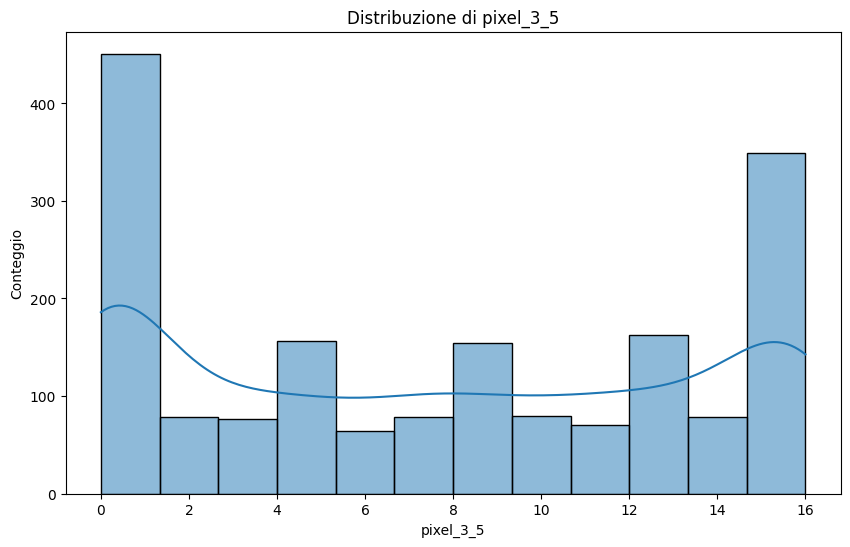

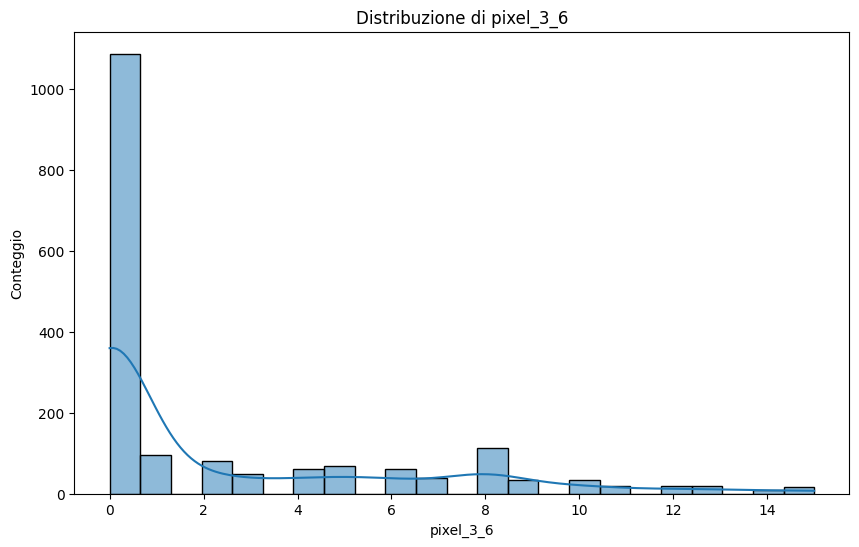

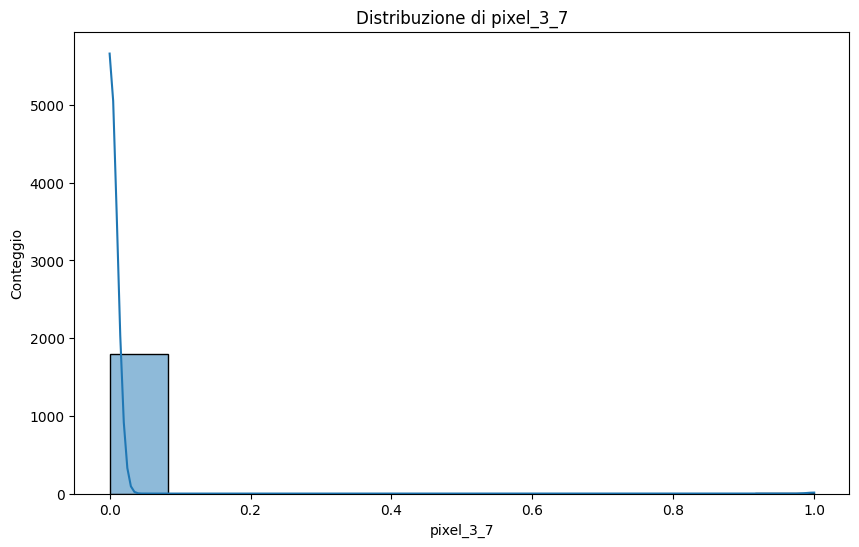

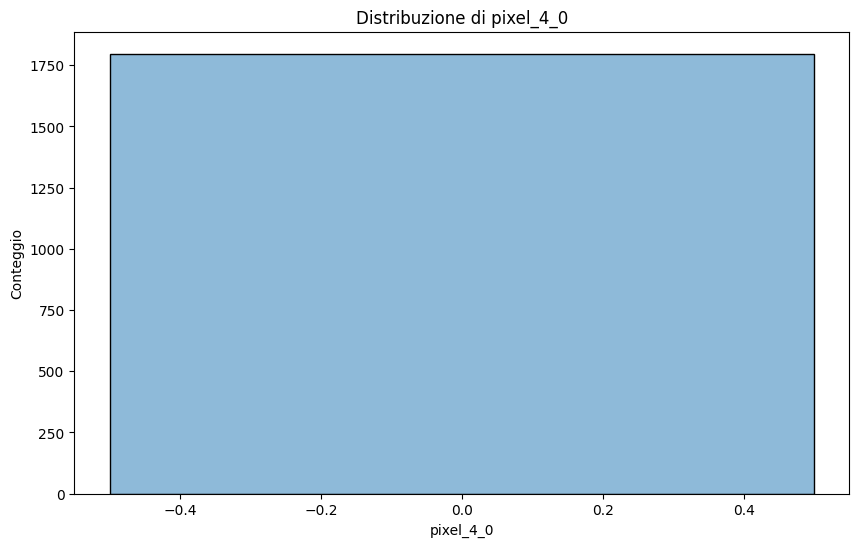

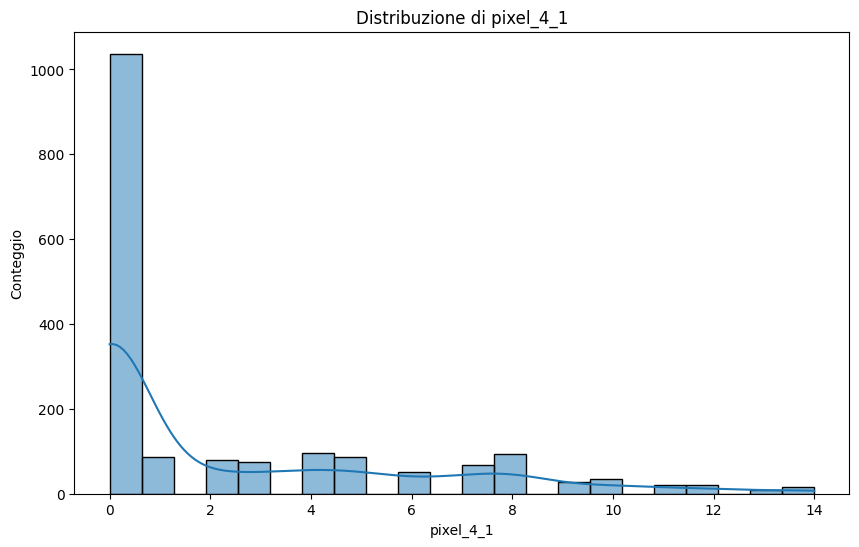

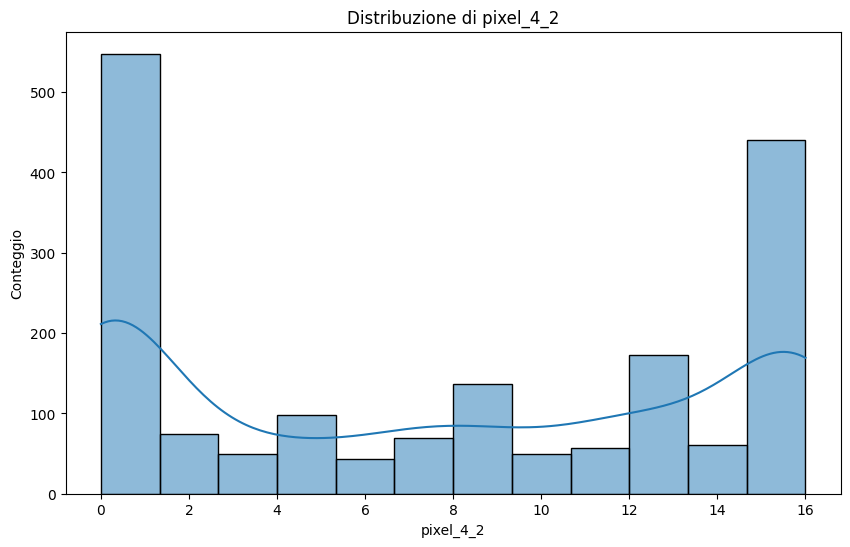

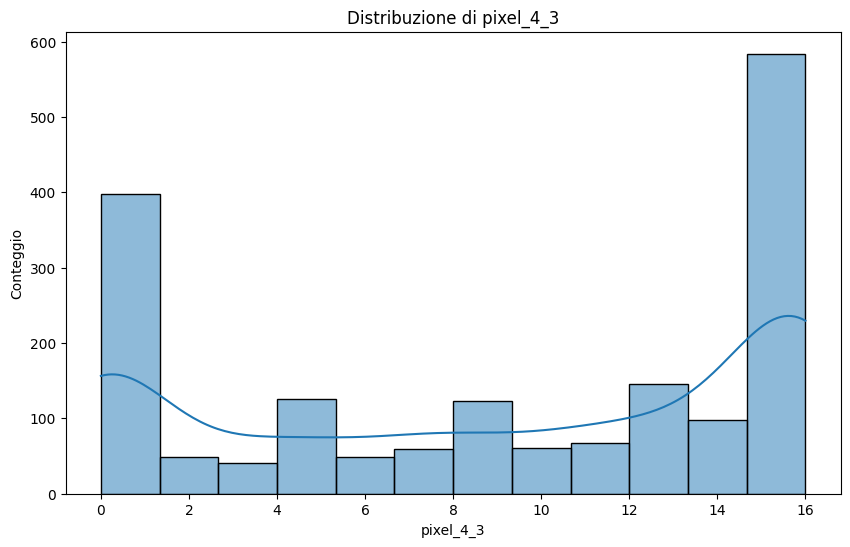

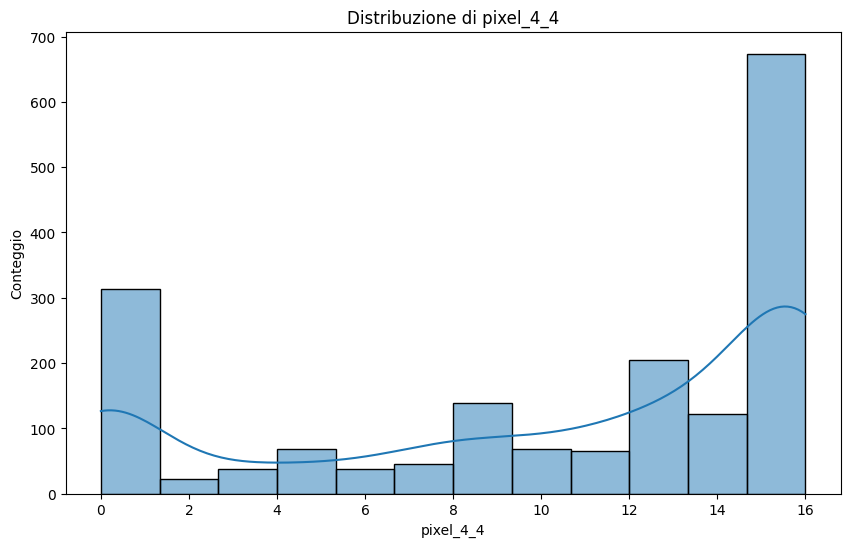

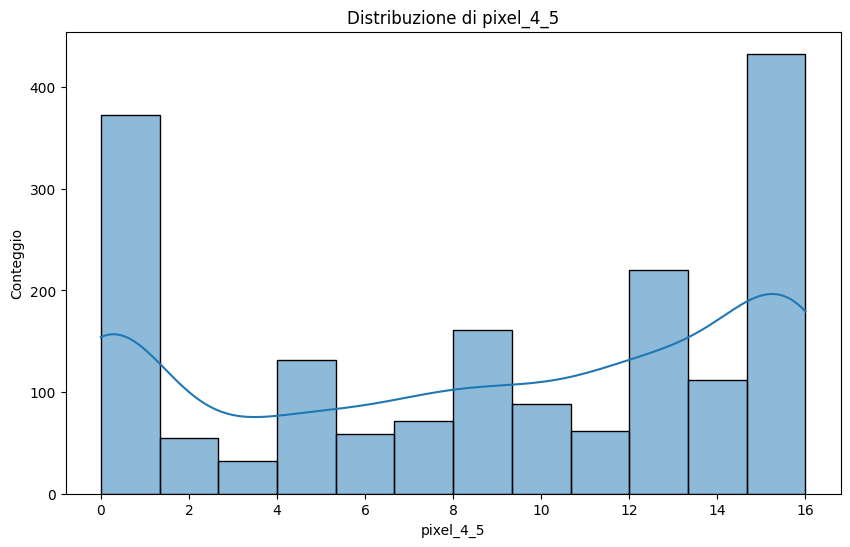

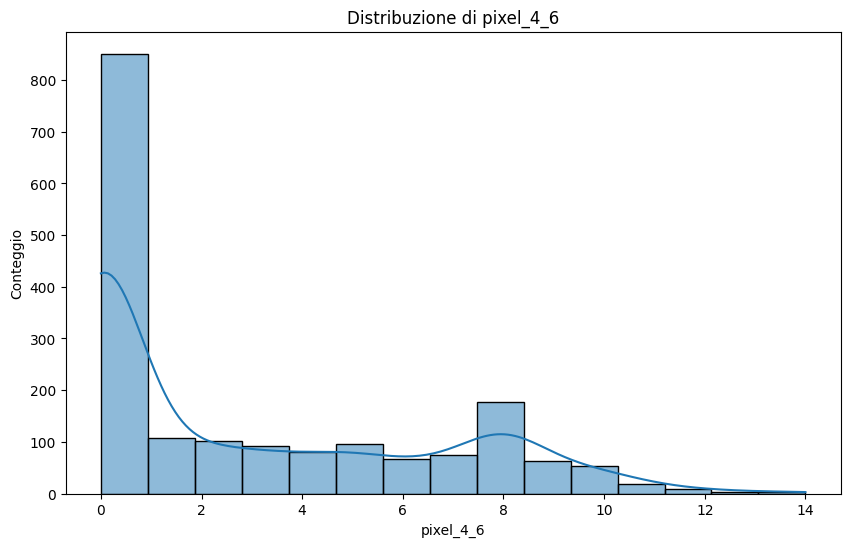

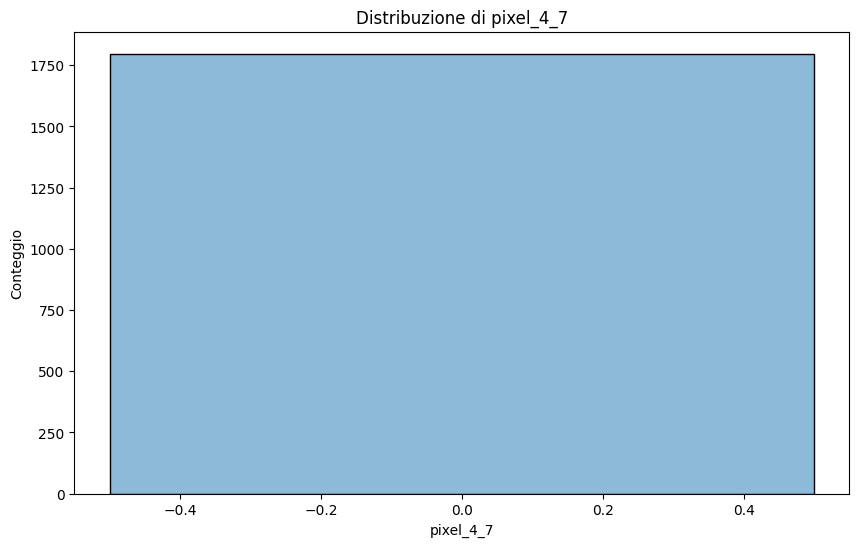

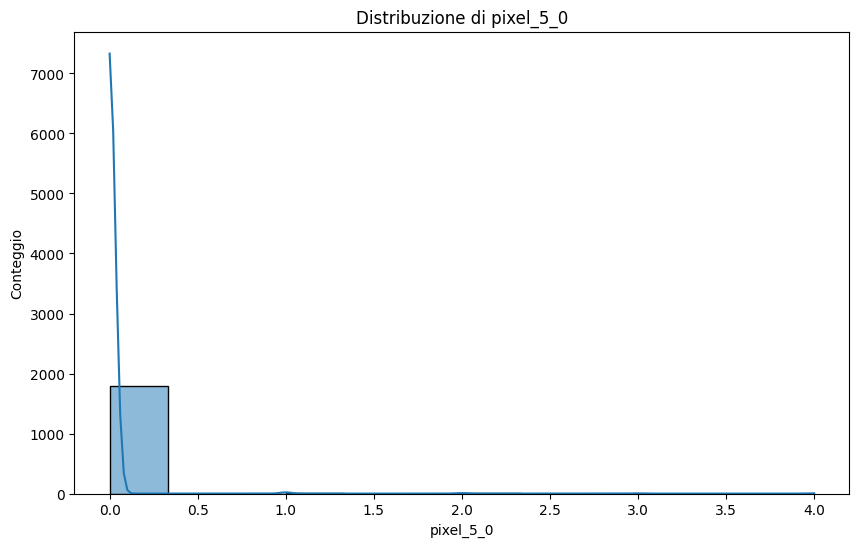

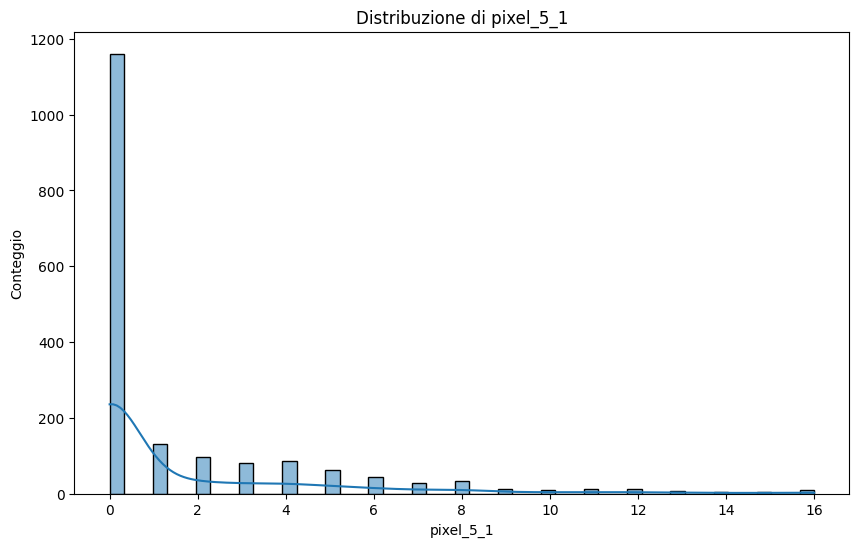

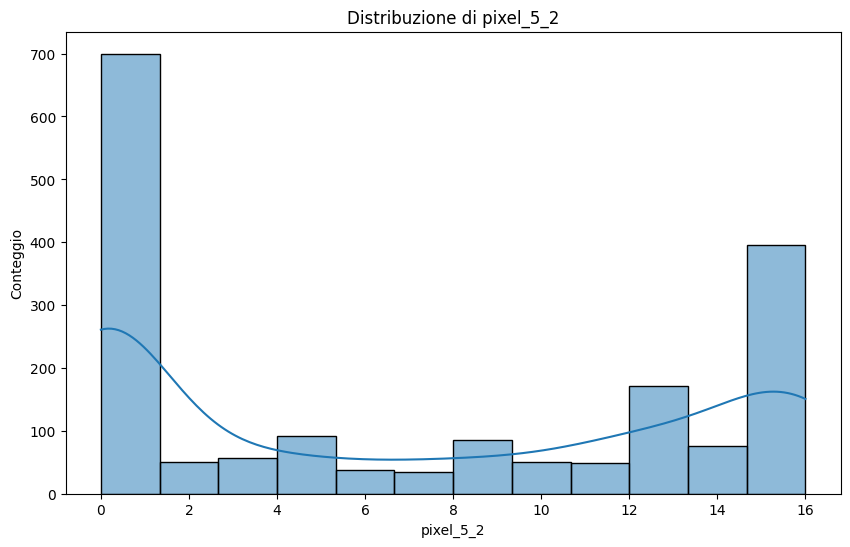

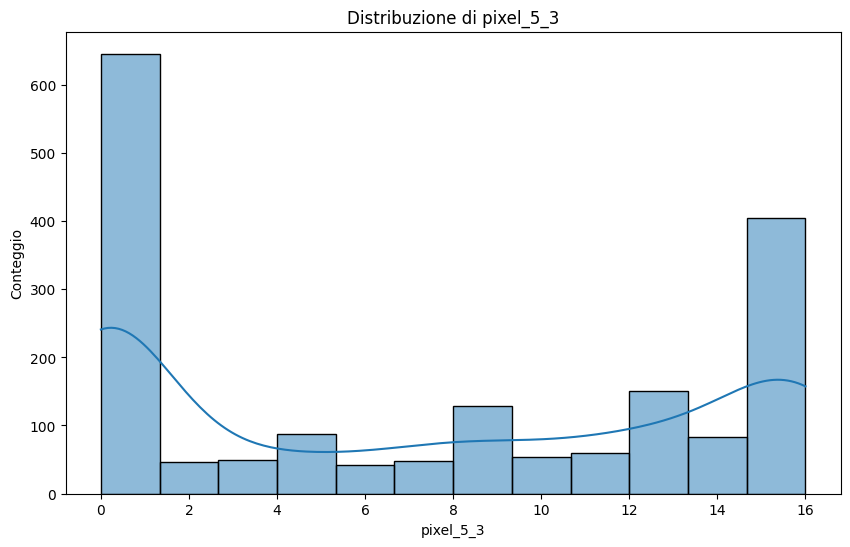

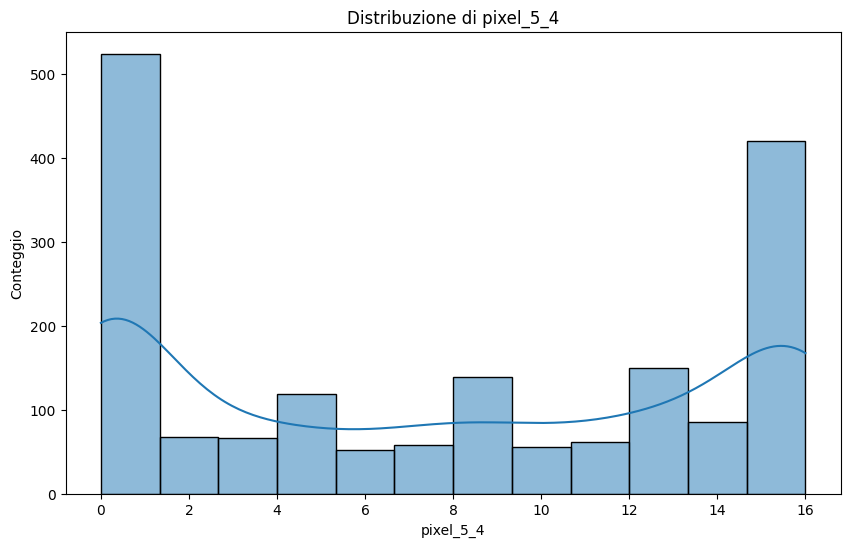

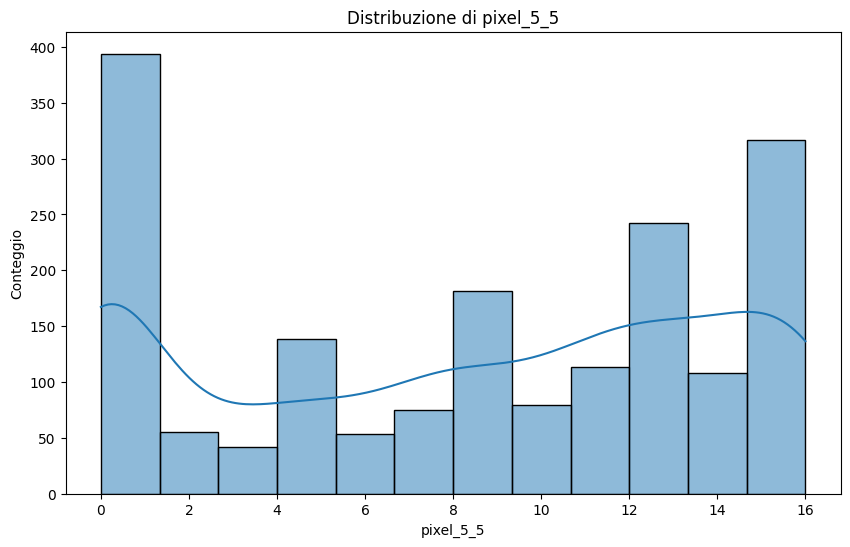

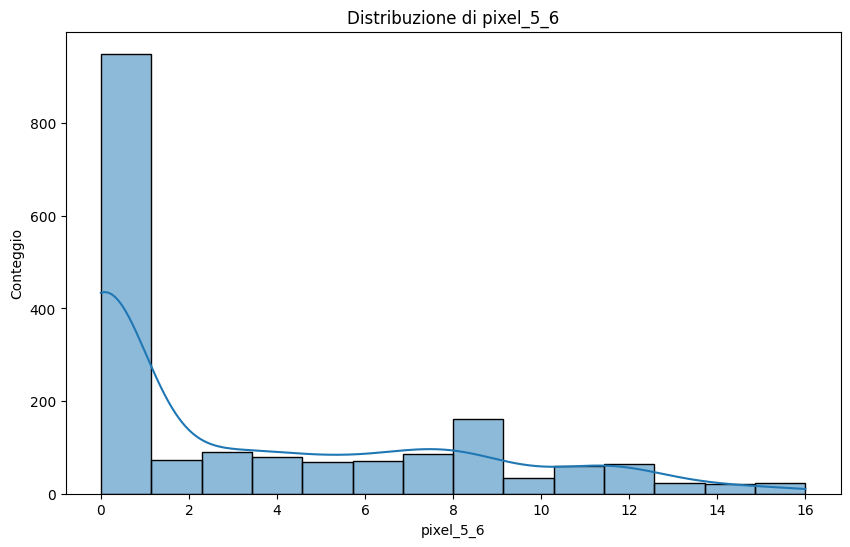

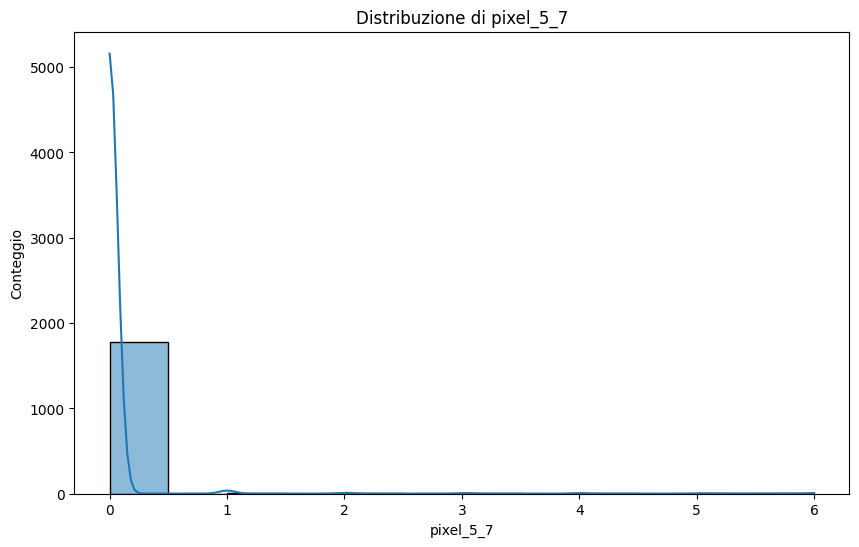

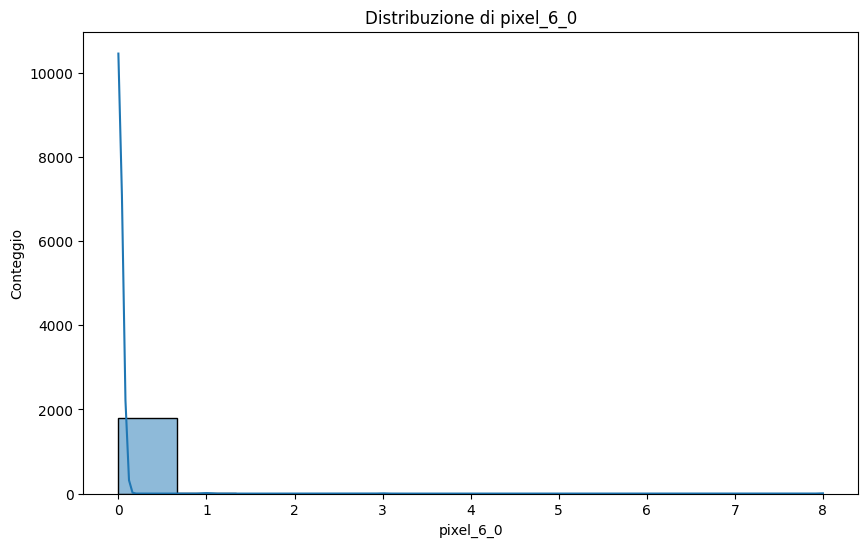

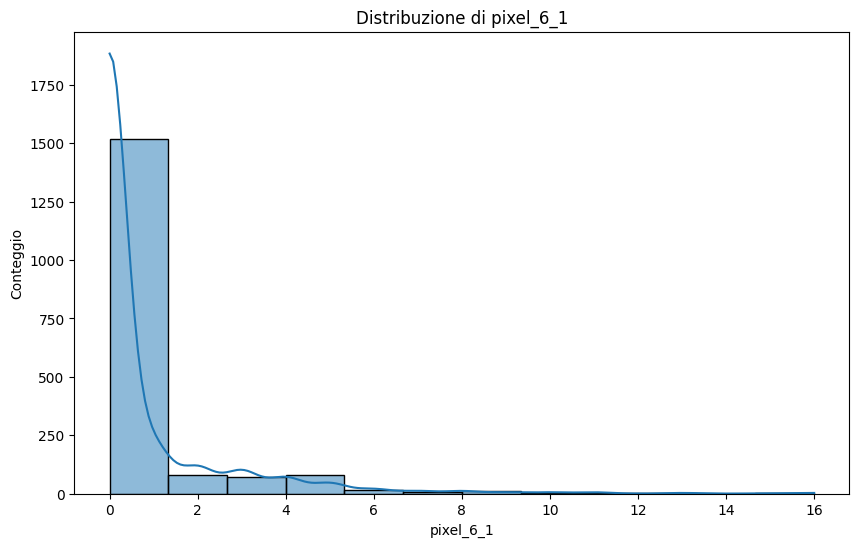

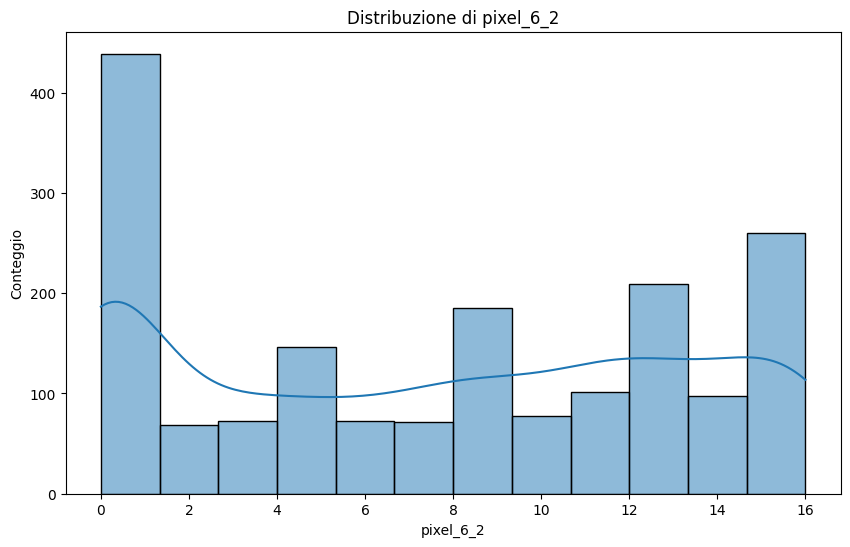

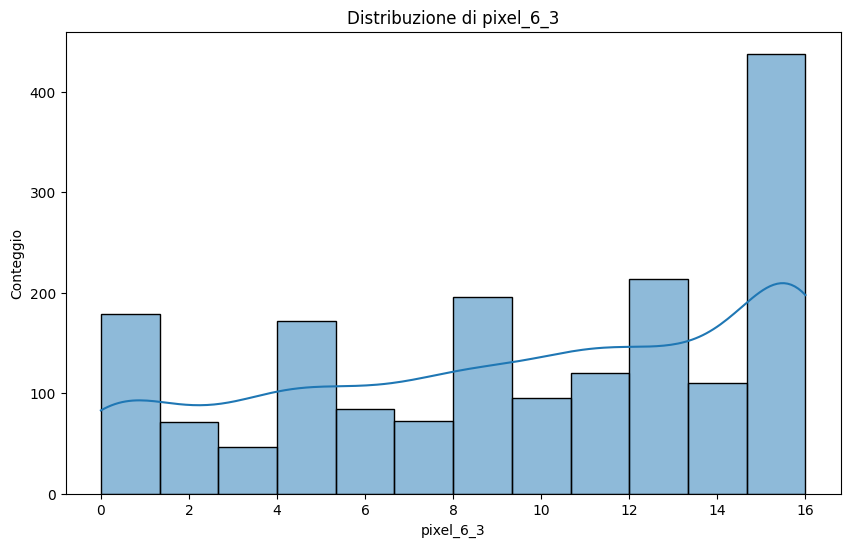

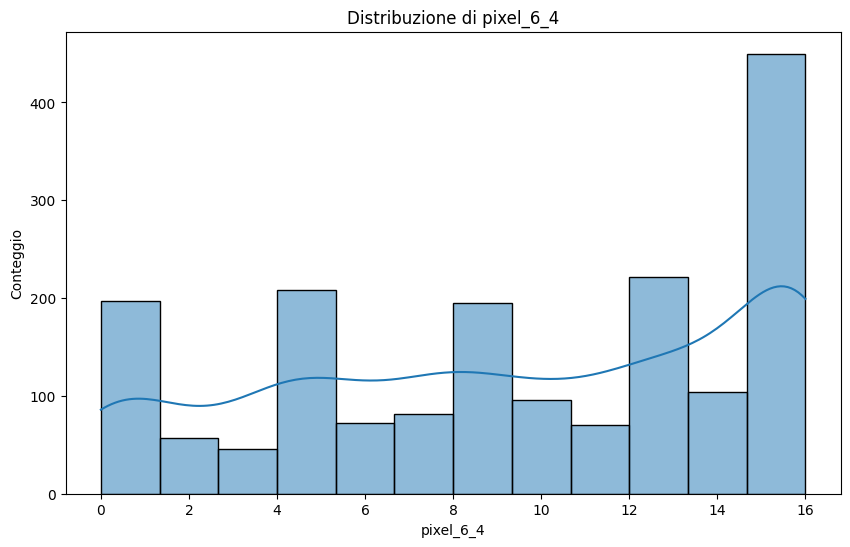

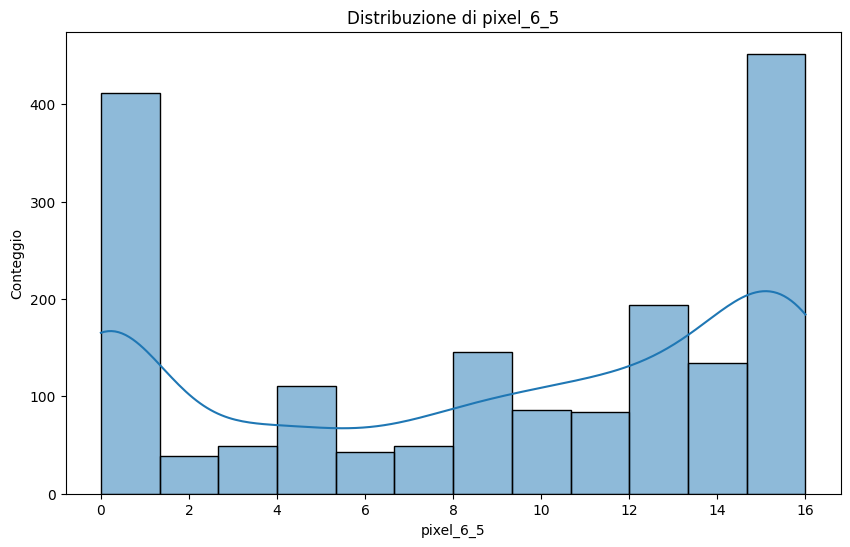

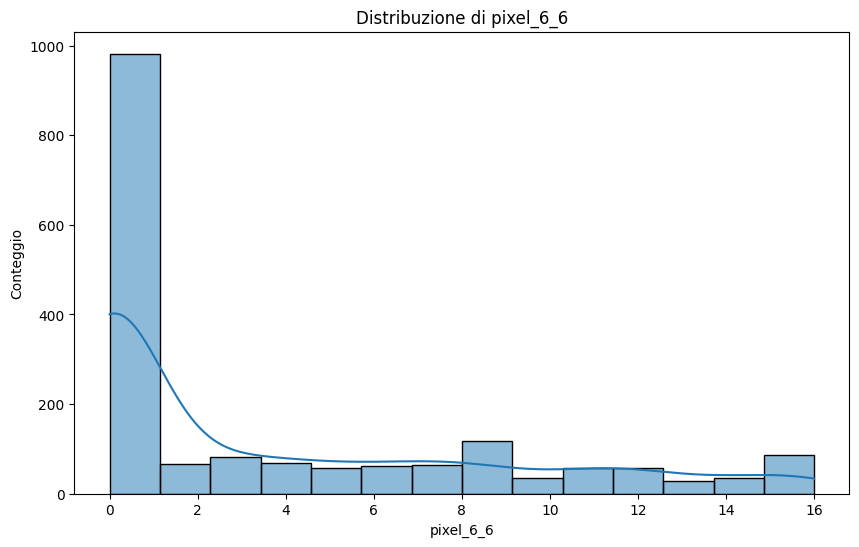

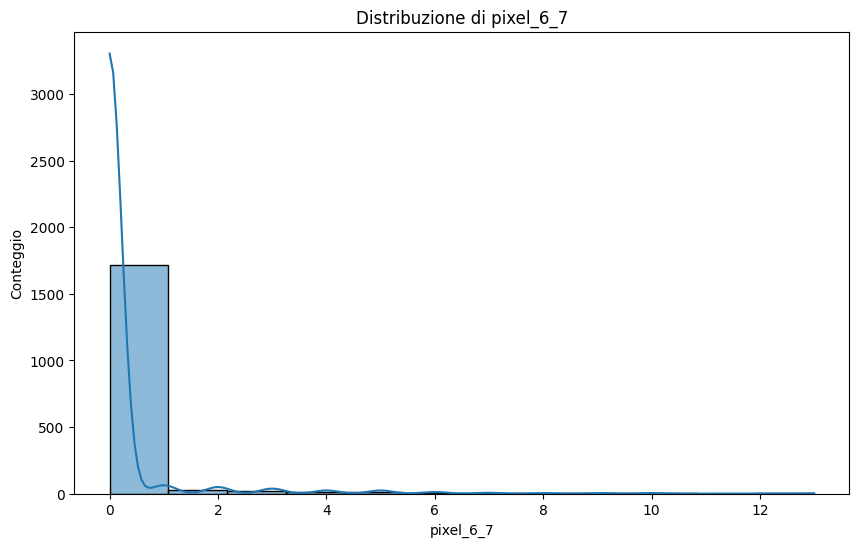

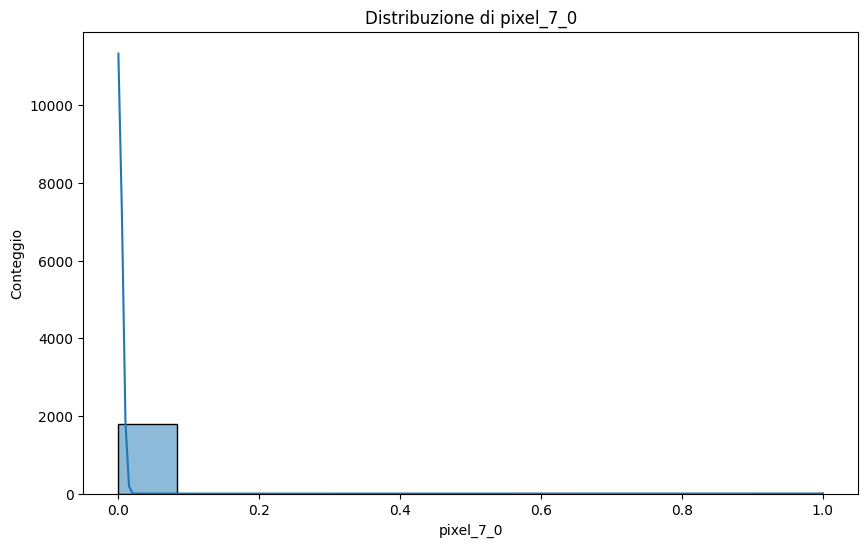

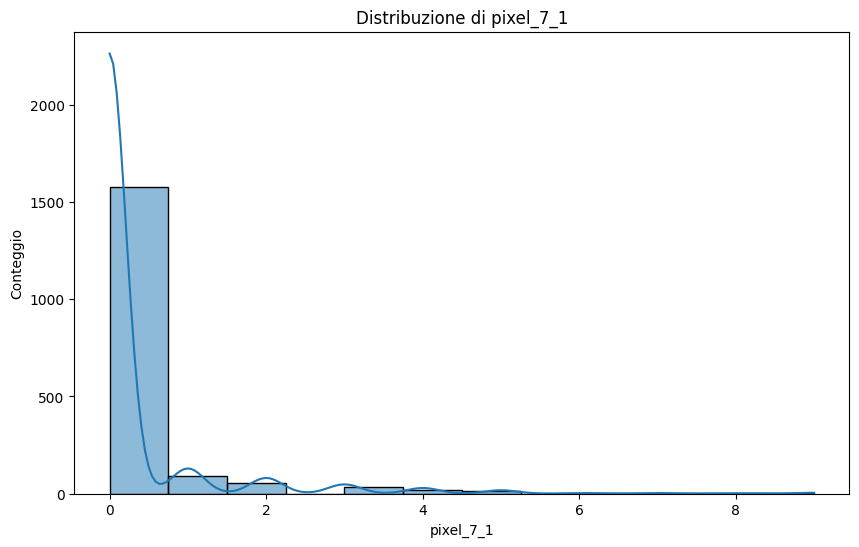

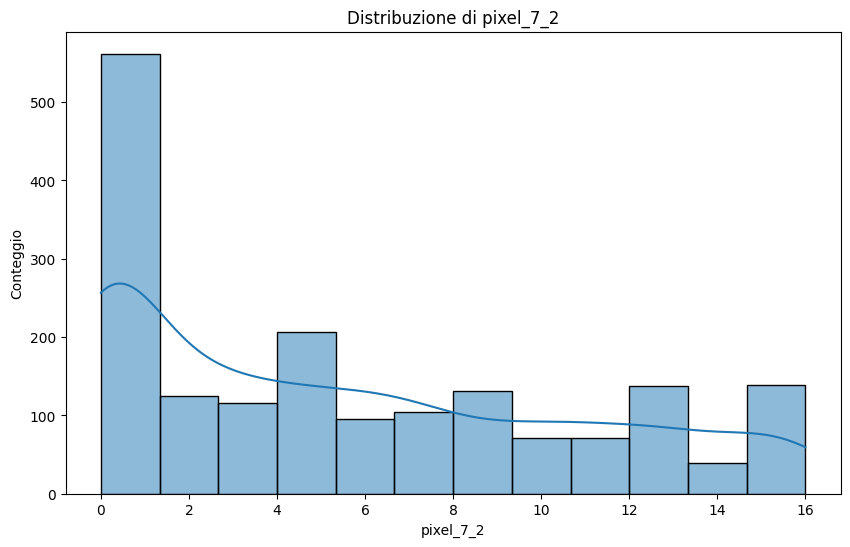

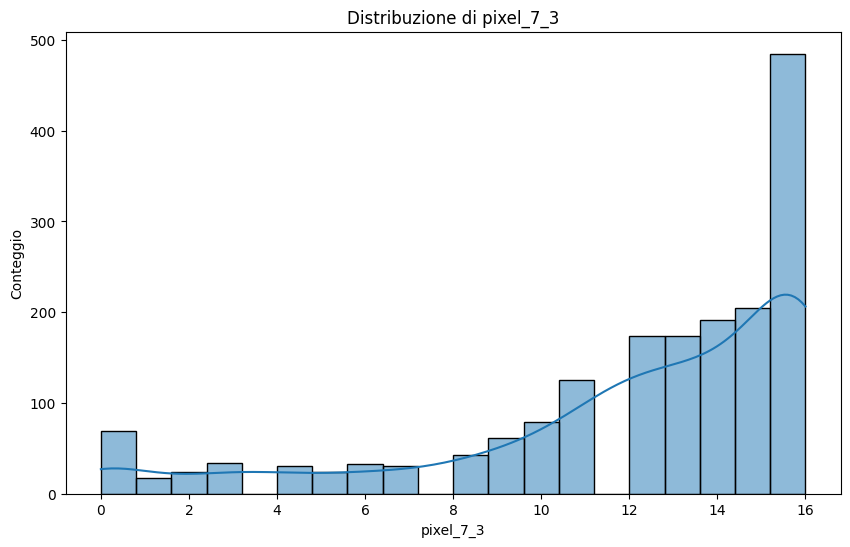

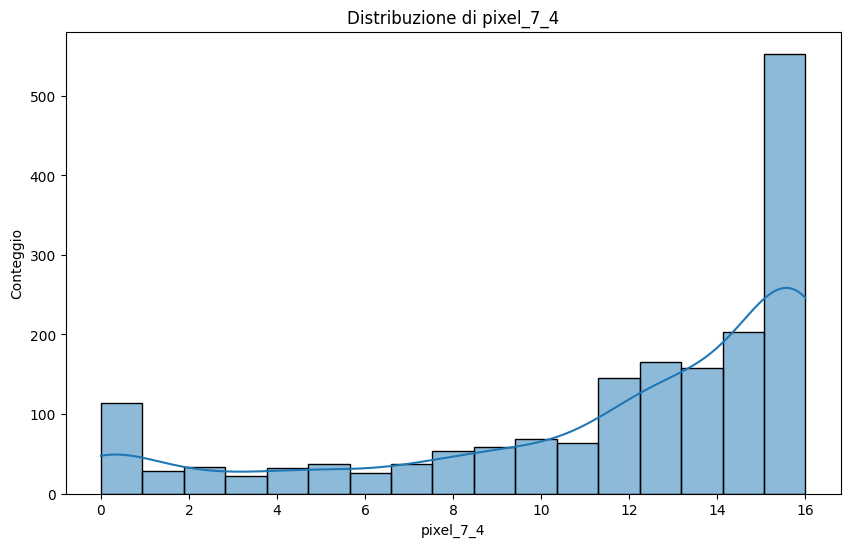

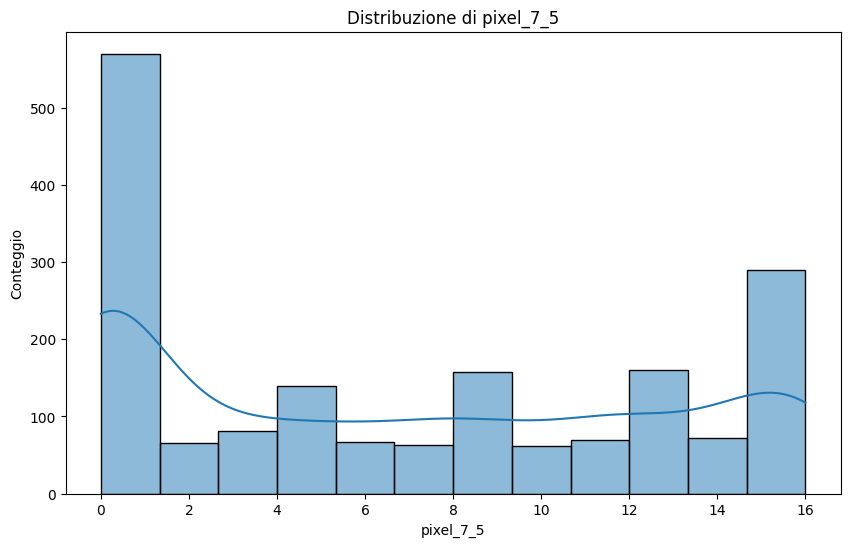

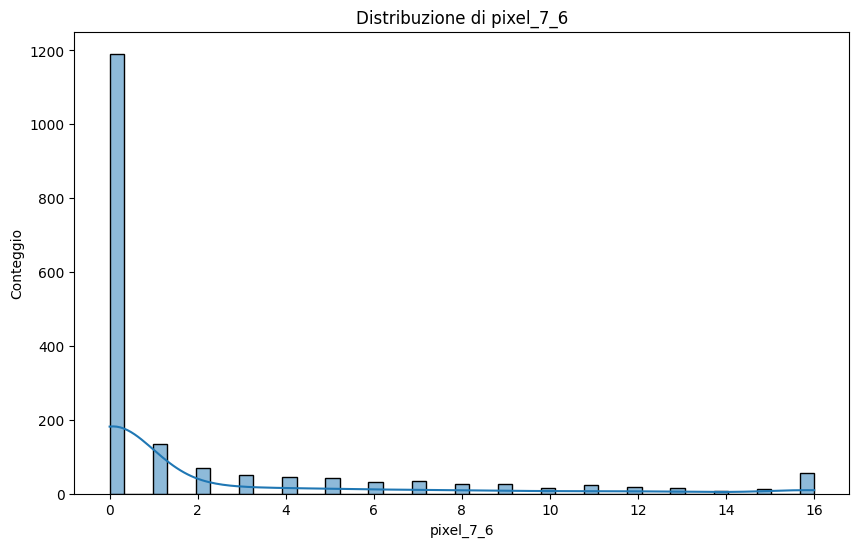

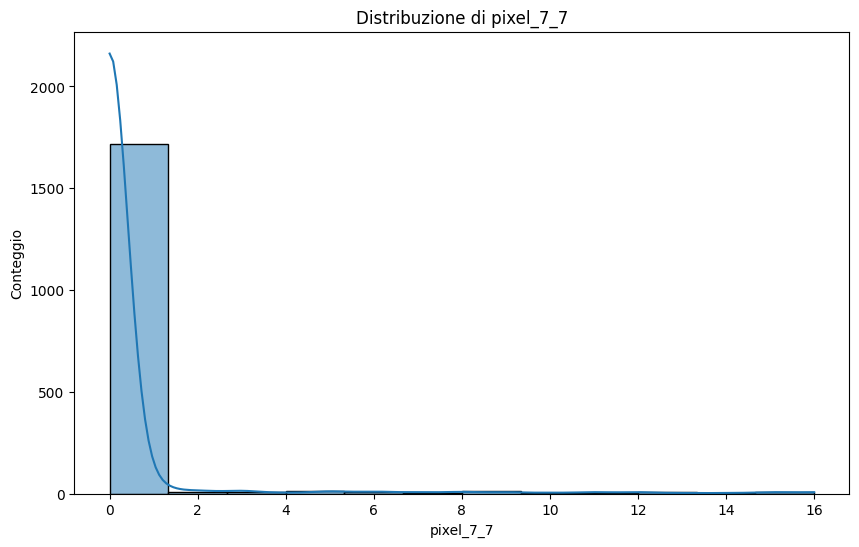


Legenda per l'interpretazione degli indici:
# Una skewness vicina a 0 indica una distribuzione simmetrica, mentre valori più alti indicano sbilanciamento.
# Interpretazione della Skewness:
# Skewness = 0: Distribuzione perfettamente simmetrica.
# Skewness > 0: Distribuzione con una coda lunga verso destra (sbilanciata a destra).
# Skewness < 0: Distribuzione con una coda lunga verso sinistra (sbilanciata a sinistra).
# Valori superiori a |1| sono considerati altamente asimmetrici.
# Interpretazione della Kurtosis:
# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).
# Kurtosis > 3: Distribuzione con code più pronunciate rispetto alla normale (leptocurtica).
# Kurtosis < 3: Distribuzione con code meno pronunciate rispetto alla normale (platicurtica).
# CV < 10%: I dati sono poco dispersi, distribuzione molto bilanciata.
# 10% ≤ CV ≤ 20%: I dati hanno una dispersione moderata, leggera variazione.
# 20% ≤ CV ≤ 50%: Dispersione moderata, la distribuzione è leggermente sbilanciata.
# CV > 

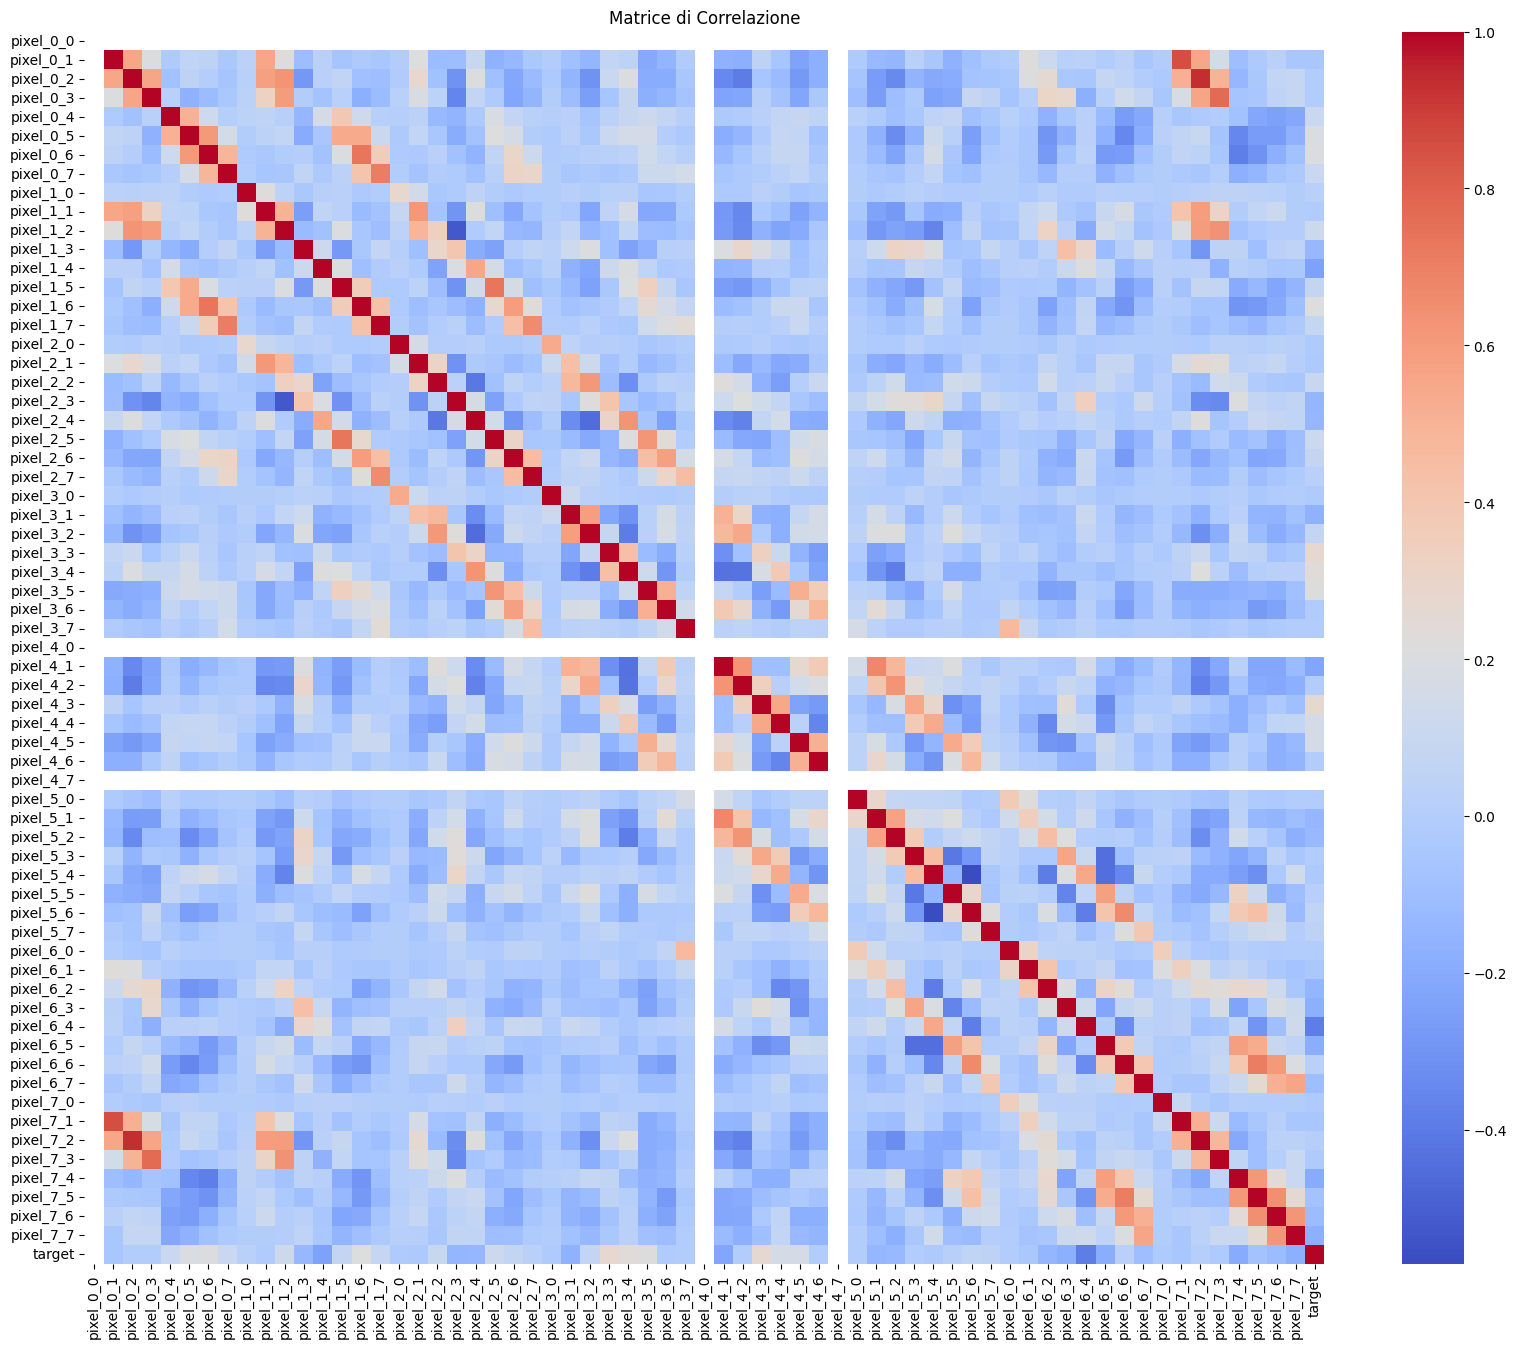

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from scipy.stats import kurtosis, skew

# Caricamento del dataset
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

# Funzioni di analisi
def plot_numerical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()

def calculate_gini(array):
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    n = len(array)
    if np.sum(array) == 0:
        return np.nan  # Evita divisioni per zero
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

def calculate_cv(array):
    mean = np.mean(array)
    if mean == 0:
        return np.nan  # Evita divisioni per zero
    return np.std(array) / mean * 100

# Calcolo degli indici per le variabili numeriche
numerical_columns = df.columns
summary_stats = {}

for col in numerical_columns:
    if col != 'target':  # Escludiamo la colonna target per evitare di calcolare gli indici sui target
        data = df[col].dropna().values
        if len(data) > 0:
            summary_stats[col] = {
                'Gini': calculate_gini(data),
                'Kurtosis': kurtosis(data, nan_policy='omit'),
                'Skewness': skew(data, nan_policy='omit'),
                'CV (%)': calculate_cv(data)
            }
            plot_numerical_distribution(df, col)

# Creazione della tabella riassuntiva
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df = summary_df.sort_values('Gini', ascending=False)

# Legenda per l'interpretazione
print("\nLegenda per l'interpretazione degli indici:")
print("# Una skewness vicina a 0 indica una distribuzione simmetrica, mentre valori più alti indicano sbilanciamento.")
print("# Interpretazione della Skewness:")
print("# Skewness = 0: Distribuzione perfettamente simmetrica.")
print("# Skewness > 0: Distribuzione con una coda lunga verso destra (sbilanciata a destra).")
print("# Skewness < 0: Distribuzione con una coda lunga verso sinistra (sbilanciata a sinistra).")
print("# Valori superiori a |1| sono considerati altamente asimmetrici.")
print("# Interpretazione della Kurtosis:")
print("# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).")
print("# Kurtosis > 3: Distribuzione con code più pronunciate rispetto alla normale (leptocurtica).")
print("# Kurtosis < 3: Distribuzione con code meno pronunciate rispetto alla normale (platicurtica).")
print("# CV < 10%: I dati sono poco dispersi, distribuzione molto bilanciata.")
print("# 10% ≤ CV ≤ 20%: I dati hanno una dispersione moderata, leggera variazione.")
print("# 20% ≤ CV ≤ 50%: Dispersione moderata, la distribuzione è leggermente sbilanciata.")
print("# CV > 50%: Grande dispersione, la distribuzione è altamente sbilanciata. Questo può indicare che i valori sono molto diversi tra loro rispetto alla media.")

print("\nTabella riassuntiva degli indici per le feature numeriche:")
print(summary_df)

# Matrice di correlazione
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()


## Baseline Machine Learning Models: Classifiers with Default Hyperparameters

### Using 3-Fold Cross-Validation

In [8]:
#ANN
def ANN(optimizer='sgd', neurons=32, batch_size=32, epochs=20, activation='relu', patience=3, loss='sparse_categorical_crossentropy'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Usiamo Input(shape) come primo livello
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))  # 10 è il numero di classi nel dataset, puoi cambiarlo in base al tuo dataset (1 per ogni cifra)
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)  # early stop patience
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=0)  # verbose impostato su 1 mostrerà il processo di addestramento
    return model

In [9]:
# Funzione per calcolare log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification = []

# 3-Fold Cross-Validation for Classification Models

# Random Forest
start_time_rf = time.time()
clf_rf = RandomForestClassifier()
scores_rf = cross_validate(clf_rf, X, y, cv=3, scoring=scorers)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification.append({
    'Algorithm': 'Random Forest',
    'Accuracy': scores_rf['test_accuracy'].mean(),
    'Recall': scores_rf['test_recall'].mean(),
    'Precision': scores_rf['test_precision'].mean(),
    'F1 Score': scores_rf['test_f1'].mean(),
    'Log Loss': scores_rf['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
clf_svm = SVC(probability=True)
scores_svm = cross_validate(clf_svm, X, y, cv=3, scoring=scorers)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification.append({
    'Algorithm': 'SVM',
    'Accuracy': scores_svm['test_accuracy'].mean(),
    'Recall': scores_svm['test_recall'].mean(),
    'Precision': scores_svm['test_precision'].mean(),
    'F1 Score': scores_svm['test_f1'].mean(),
    'Log Loss': scores_svm['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
clf_knn = KNeighborsClassifier()
scores_knn = cross_validate(clf_knn, X, y, cv=3, scoring=scorers)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification.append({
    'Algorithm': 'KNN',
    'Accuracy': scores_knn['test_accuracy'].mean(),
    'Recall': scores_knn['test_recall'].mean(),
    'Precision': scores_knn['test_precision'].mean(),
    'F1 Score': scores_knn['test_f1'].mean(),
    'Log Loss': scores_knn['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
clf_ann = KerasClassifier(model=ANN, verbose=0)
scores_ann = cross_validate(clf_ann, X, y, cv=3, scoring=scorers)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification.append({
    'Algorithm': 'ANN',
    'Accuracy': scores_ann['test_accuracy'].mean(),
    'Recall': scores_ann['test_recall'].mean(),
    'Precision': scores_ann['test_precision'].mean(),
    'F1 Score': scores_ann['test_f1'].mean(),
    'Log Loss': scores_ann['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_df_3_fold_classification = pd.DataFrame(results_classification)

# Stampa dei risultati
print("\nResults for Classification Models (3-Fold Cross-Validation):")
print(results_df_3_fold_classification.to_string(index=False))


Results for Classification Models (3-Fold Cross-Validation):
    Algorithm  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest  0.944352 0.944223   0.945732  0.944265  0.427887              2.62
          SVM  0.969950 0.969786   0.970958  0.969916  0.161959              1.76
          KNN  0.962716 0.962494   0.963858  0.962621  0.466567              0.23
          ANN  0.989427 0.989337   0.989639  0.989393  0.050931             14.06


## HPO Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [10]:
# Funzione per calcolare log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification_grid_search = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50],
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
grid_rf = GridSearchCV(clf_rf, rf_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_grid_search.append({
    'Algorithm': 'Random Forest',
    'Best Params': grid_rf.best_params_,
    'Accuracy': grid_rf.best_score_,
    'Recall': grid_rf.cv_results_['mean_test_recall'][grid_rf.best_index_],
    'Precision': grid_rf.cv_results_['mean_test_precision'][grid_rf.best_index_],
    'F1 Score': grid_rf.cv_results_['mean_test_f1'][grid_rf.best_index_],
    'Log Loss': grid_rf.cv_results_['mean_test_log_loss'][grid_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
grid_svm = GridSearchCV(clf_svm, svm_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_grid_search.append({
    'Algorithm': 'SVM',
    'Best Params': grid_svm.best_params_,
    'Accuracy': grid_svm.best_score_,
    'Recall': grid_svm.cv_results_['mean_test_recall'][grid_svm.best_index_],
    'Precision': grid_svm.cv_results_['mean_test_precision'][grid_svm.best_index_],
    'F1 Score': grid_svm.cv_results_['mean_test_f1'][grid_svm.best_index_],
    'Log Loss': grid_svm.cv_results_['mean_test_log_loss'][grid_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': [2, 3, 5, 10, 15, 20],
}
clf_knn = KNeighborsClassifier()
grid_knn = GridSearchCV(clf_knn, knn_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_grid_search.append({
    'Algorithm': 'KNN',
    'Best Params': grid_knn.best_params_,
    'Accuracy': grid_knn.best_score_,
    'Recall': grid_knn.cv_results_['mean_test_recall'][grid_knn.best_index_],
    'Precision': grid_knn.cv_results_['mean_test_precision'][grid_knn.best_index_],
    'F1 Score': grid_knn.cv_results_['mean_test_f1'][grid_knn.best_index_],
    'Log Loss': grid_knn.cv_results_['mean_test_log_loss'][grid_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'batch_size': [16, 32],
    'epochs': [20, 50],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh']
}

clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=16, patience=2, verbose=0)
grid_ann = GridSearchCV(clf_ann, ann_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_grid_search.append({
    'Algorithm': 'ANN',
    'Best Params': grid_ann.best_params_,
    'Accuracy': grid_ann.best_score_,
    'Recall': grid_ann.cv_results_['mean_test_recall'][grid_ann.best_index_],
    'Precision': grid_ann.cv_results_['mean_test_precision'][grid_ann.best_index_],
    'F1 Score': grid_ann.cv_results_['mean_test_f1'][grid_ann.best_index_],
    'Log Loss': grid_ann.cv_results_['mean_test_log_loss'][grid_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_classification_df_grid_search = pd.DataFrame(results_classification_grid_search)
print("Results for Grid Search")
print(results_classification_df_grid_search.to_string(index=False))

Results for Grid Search
    Algorithm                                                                Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}  0.936004 0.935917   0.937570  0.935648  0.466019              9.91
          SVM                                                 {'C': 10, 'kernel': 'rbf'}  0.973845 0.973780   0.974703  0.973846  0.159104             12.83
          KNN                                                         {'n_neighbors': 3}  0.968280 0.968129   0.969136  0.968234  0.586421              1.25
          ANN {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}  0.951586 0.951580   0.952496  0.951526  0.166835            639.16


## HPO Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [11]:
# Define scorers with precision included
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# List to store results
results_classification_random_search = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': sp_randint(10, 100),
    "max_features": sp_randint(1, 64),
    'max_depth': sp_randint(5, 50),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "criterion": ['gini', 'entropy']
}
n_iter_search_rf = 20  # Number of iterations
clf_rf = RandomForestClassifier(random_state=0)
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=n_iter_search_rf, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_random_search.append({
    'Algorithm': 'Random Forest',
    'Best Params': Random_rf.best_params_,
    'Accuracy': Random_rf.best_score_,
    'Recall': Random_rf.cv_results_['mean_test_recall'][Random_rf.best_index_],
    'Precision': Random_rf.cv_results_['mean_test_precision'][Random_rf.best_index_],  # Added precision
    'F1 Score': Random_rf.cv_results_['mean_test_f1'][Random_rf.best_index_],
    'Log Loss': Random_rf.cv_results_['mean_test_log_loss'][Random_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': stats.uniform(0, 50),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
n_iter_search_svm = 20
clf_svm = SVC(gamma='scale', probability=True)
Random_svm = RandomizedSearchCV(clf_svm, param_distributions=svm_params, n_iter=n_iter_search_svm, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_random_search.append({
    'Algorithm': 'SVM',
    'Best Params': Random_svm.best_params_,
    'Accuracy': Random_svm.best_score_,
    'Recall': Random_svm.cv_results_['mean_test_recall'][Random_svm.best_index_],
    'Precision': Random_svm.cv_results_['mean_test_precision'][Random_svm.best_index_],  # Added precision
    'F1 Score': Random_svm.cv_results_['mean_test_f1'][Random_svm.best_index_],
    'Log Loss': Random_svm.cv_results_['mean_test_log_loss'][Random_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': range(1, 20),
}
n_iter_search_knn = 10
clf_knn = KNeighborsClassifier()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=n_iter_search_knn, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_random_search.append({
    'Algorithm': 'KNN',
    'Best Params': Random_knn.best_params_,
    'Accuracy': Random_knn.best_score_,
    'Recall': Random_knn.cv_results_['mean_test_recall'][Random_knn.best_index_],
    'Precision': Random_knn.cv_results_['mean_test_precision'][Random_knn.best_index_],  # Added precision
    'F1 Score': Random_knn.cv_results_['mean_test_f1'][Random_knn.best_index_],
    'Log Loss': Random_knn.cv_results_['mean_test_log_loss'][Random_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'neurons': sp_randint(10, 100),
    'epochs': [20, 50],
    'patience': sp_randint(3, 20)
}
n_iter_search_ann = 10
clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=10, patience=6, verbose=0)
Random_ann = RandomizedSearchCV(clf_ann, param_distributions=ann_params, n_iter=n_iter_search_ann, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_random_search.append({
    'Algorithm': 'ANN',
    'Best Params': Random_ann.best_params_,
    'Accuracy': Random_ann.best_score_,
    'Recall': Random_ann.cv_results_['mean_test_recall'][Random_ann.best_index_],
    'Precision': Random_ann.cv_results_['mean_test_precision'][Random_ann.best_index_],  # Added precision
    'F1 Score': Random_ann.cv_results_['mean_test_f1'][Random_ann.best_index_],
    'Log Loss': Random_ann.cv_results_['mean_test_log_loss'][Random_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

# Convert results to DataFrame
results_classification_df_random_search = pd.DataFrame(results_classification_random_search)

# Print results
print("Results for Random Search")
print(results_classification_df_random_search.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Results for Random Search
    Algorithm                                                                                                                  Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'criterion': 'gini', 'max_depth': 32, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 88}  0.929883 0.929883   0.931561  0.929670 -0.544428             31.33
          SVM                                                                                   {'C': 17.109645047134624, 'kernel': 'rbf'}  0.973845 0.973845   0.974740  0.973896 -0.159714             20.12
          KNN                                                                                                           {'n_neighbors': 3}  0.968280 0.968280   0.969148  0.968315 -0.586421              2.66
          ANN                 {'activation': 'relu', 'batch_size': 64, 'epochs': 20, 'neurons': 61, 'optimizer': 'rmsprop', 'patience': 3}  0.9910

## HPO Algorithm 3: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

### Using skopt.BayesSearchCV

In [12]:
# Definire i punteggi per log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers con precision aggiunto
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification_bo = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': Integer(10, 100),
    'max_features': Integer(1, 64),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 11),
    'min_samples_leaf': Integer(1, 11),
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
with parallel_backend('threading'):
    Bayes_rf = BayesSearchCV(clf_rf, rf_params, cv=3, n_iter=20, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_bo.append({
    'Algorithm': 'Random Forest',
    'Best Params': Bayes_rf.best_params_,
    'Accuracy': Bayes_rf.best_score_,
    'Recall': Bayes_rf.cv_results_['mean_test_recall'][Bayes_rf.best_index_],
    'Precision': Bayes_rf.cv_results_['mean_test_precision'][Bayes_rf.best_index_],
    'F1 Score': Bayes_rf.cv_results_['mean_test_f1'][Bayes_rf.best_index_],
    'Log Loss': Bayes_rf.cv_results_['mean_test_log_loss'][Bayes_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': Real(0.01, 50),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
with parallel_backend('threading'):
    Bayes_svm = BayesSearchCV(clf_svm, svm_params, cv=3, n_iter=20, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_bo.append({
    'Algorithm': 'SVM',
    'Best Params': Bayes_svm.best_params_,
    'Accuracy': Bayes_svm.best_score_,
    'Recall': Bayes_svm.cv_results_['mean_test_recall'][Bayes_svm.best_index_],
    'Precision': Bayes_svm.cv_results_['mean_test_precision'][Bayes_svm.best_index_],
    'F1 Score': Bayes_svm.cv_results_['mean_test_f1'][Bayes_svm.best_index_],
    'Log Loss': Bayes_svm.cv_results_['mean_test_log_loss'][Bayes_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': Integer(1, 20),
}
clf_knn = KNeighborsClassifier()
with parallel_backend('threading'):
    Bayes_knn = BayesSearchCV(clf_knn, knn_params, cv=3, n_iter=10, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_bo.append({
    'Algorithm': 'KNN',
    'Best Params': Bayes_knn.best_params_,
    'Accuracy': Bayes_knn.best_score_,
    'Recall': Bayes_knn.cv_results_['mean_test_recall'][Bayes_knn.best_index_],
    'Precision': Bayes_knn.cv_results_['mean_test_precision'][Bayes_knn.best_index_],
    'F1 Score': Bayes_knn.cv_results_['mean_test_f1'][Bayes_knn.best_index_],
    'Log Loss': Bayes_knn.cv_results_['mean_test_log_loss'][Bayes_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'neurons': Integer(10, 100),
    'epochs': Categorical([20, 50]),
    'patience': Integer(3, 20)
}
clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=10, patience=6, verbose=0)
with parallel_backend('threading'):
    Bayes_ann = BayesSearchCV(clf_ann, ann_params, cv=3, n_iter=10, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_bo.append({
    'Algorithm': 'ANN',
    'Best Params': Bayes_ann.best_params_,
    'Accuracy': Bayes_ann.best_score_,
    'Recall': Bayes_ann.cv_results_['mean_test_recall'][Bayes_ann.best_index_],
    'Precision': Bayes_ann.cv_results_['mean_test_precision'][Bayes_ann.best_index_],
    'F1 Score': Bayes_ann.cv_results_['mean_test_f1'][Bayes_ann.best_index_],
    'Log Loss': Bayes_ann.cv_results_['mean_test_log_loss'][Bayes_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione DataFrame e visualizzazione risultati
results_classification_df_bo = pd.DataFrame(results_classification_bo)
print("Results for Bayesian Optimization")
print(results_classification_df_bo.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Results for Bayesian Optimization
    Algorithm                                                                                                                   Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'criterion': 'gini', 'max_depth': 31, 'max_features': 13, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 64}  0.931553 0.931507   0.933245  0.931364  0.417181             46.86
          SVM                                                                                     {'C': 7.732902151801463, 'kernel': 'rbf'}  0.974402 0.974336   0.975269  0.974416  0.159219             40.03
          KNN                                                                                                            {'n_neighbors': 4}  0.963829 0.963550   0.965475  0.963799  0.500377              2.65
          ANN                  {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'neurons': 96, 'optimizer': 'rmsprop', 'patience

### Using skopt.gp_minimize

In [13]:


# Definire i punteggi per log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers con precisione inclusa
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification_skopt_gp_minimize = []

def evaluate_metrics(model, X, y):
    """Evaluate multiple metrics and return them."""
    accuracy = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['accuracy']))
    recall = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['recall']))
    precision = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['precision']))
    f1 = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['f1']))
    log_loss_val = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['log_loss']))
    return accuracy, recall, precision, f1, log_loss_val

def composite_score(accuracy, recall, precision, f1, log_loss_val, alpha=1.0, beta=1.0, gamma=1.0, delta=1.0):
    """Calculate a composite score from multiple metrics."""
    return - (alpha * accuracy + beta * recall + gamma * precision + delta * f1 + log_loss_val)

# Random Forest
start_time_rf = time.time()
reg_rf = RandomForestClassifier()

space_rf = [
    Integer(10, 100, name='n_estimators'),
    Integer(5, 50, name='max_depth'),
    Integer(1, 64, name='max_features'),
    Integer(2, 11, name='min_samples_split'),
    Integer(1, 11, name='min_samples_leaf'),
    Categorical(['gini', 'entropy'], name='criterion'),
]

@use_named_args(space_rf)
def objective_rf(**params):
    reg_rf.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_rf, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_rf = gp_minimize(objective_rf, space_rf, n_calls=20, random_state=0)

elapsed_time_rf = time.time() - start_time_rf
# Rebuild the model with the best parameters
best_rf = RandomForestClassifier(**dict(zip([dim.name for dim in space_rf], res_gp_rf.x)))
best_accuracy_rf, best_recall_rf, best_precision_rf, best_f1_rf, best_log_loss_rf = evaluate_metrics(best_rf, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'Random Forest',
    'Best Params': dict(zip([dim.name for dim in space_rf], res_gp_rf.x)),
    'Accuracy': best_accuracy_rf,
    'Recall': best_recall_rf,
    'Precision': best_precision_rf,
    'F1 Score': best_f1_rf,
    'Log Loss': -best_log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
reg_svm = SVC(gamma='scale', probability=True)

space_svm = [
    Real(0.01, 50, name='C'),
    Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'),
]

@use_named_args(space_svm)
def objective_svm(**params):
    reg_svm.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_svm, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_svm = gp_minimize(objective_svm, space_svm, n_calls=20, random_state=0)

elapsed_time_svm = time.time() - start_time_svm
# Rebuild the model with the best parameters
best_svm = SVC(**dict(zip([dim.name for dim in space_svm], res_gp_svm.x)), probability=True)
best_accuracy_svm, best_recall_svm, best_precision_svm, best_f1_svm, best_log_loss_svm = evaluate_metrics(best_svm, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'SVM',
    'Best Params': dict(zip([dim.name for dim in space_svm], res_gp_svm.x)),
    'Accuracy': best_accuracy_svm,
    'Recall': best_recall_svm,
    'Precision': best_precision_svm,
    'F1 Score': best_f1_svm,
    'Log Loss': -best_log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
reg_knn = KNeighborsClassifier()

space_knn = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space_knn)
def objective_knn(**params):
    reg_knn.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_knn, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_knn = gp_minimize(objective_knn, space_knn, n_calls=10, random_state=0)

elapsed_time_knn = time.time() - start_time_knn
# Rebuild the model with the best parameters
best_knn = KNeighborsClassifier(**dict(zip([dim.name for dim in space_knn], res_gp_knn.x)))
best_accuracy_knn, best_recall_knn, best_precision_knn, best_f1_knn, best_log_loss_knn = evaluate_metrics(best_knn, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'KNN',
    'Best Params': dict(zip([dim.name for dim in space_knn], res_gp_knn.x)),
    'Accuracy': best_accuracy_knn,
    'Recall': best_recall_knn,
    'Precision': best_precision_knn,
    'F1 Score': best_f1_knn,
    'Log Loss': -best_log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
space_ann = [
    Categorical(['lbfgs', 'adam', 'sgd'], name='optimizer'),
    Categorical(['relu', 'tanh'], name='activation'),
    Integer(10, 100, name='neurons'),
    Integer(3, 20, name='patience'),
    Integer(16, 64, name='batch_size'),
    Categorical([20, 50], name='epochs'),
]

@use_named_args(space_ann)
def objective_ann(optimizer, activation, neurons, patience, batch_size, epochs):
    model = MLPClassifier(
        hidden_layer_sizes=(neurons,),
        activation=activation,
        solver=optimizer,
        batch_size=batch_size,
        max_iter=epochs,
        early_stopping=True,
        n_iter_no_change=patience,
        random_state=42
    )
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(model, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_ann = gp_minimize(objective_ann, space_ann, n_calls=20, random_state=42, verbose=0)

elapsed_time_ann = time.time() - start_time_ann
# Rebuild the model with the best parameters
best_ann = MLPClassifier(
    hidden_layer_sizes=(res_gp_ann.x[2],),
    activation=res_gp_ann.x[1],
    solver=res_gp_ann.x[0],
    batch_size=res_gp_ann.x[4],
    max_iter=res_gp_ann.x[5],
    early_stopping=True,
    n_iter_no_change=res_gp_ann.x[3],
    random_state=42
)
best_accuracy_ann, best_recall_ann, best_precision_ann, best_f1_ann, best_log_loss_ann = evaluate_metrics(best_ann, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'ANN',
    'Best Params': dict(zip([dim.name for dim in space_ann], res_gp_ann.x)),
    'Accuracy': best_accuracy_ann,
    'Recall': best_recall_ann,
    'Precision': best_precision_ann,
    'F1 Score': best_f1_ann,
    'Log Loss': -best_log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_skopt_gp_minimize = pd.DataFrame(results_classification_skopt_gp_minimize)
print("Results for skopt.gp_minimize")
print(results_classification_df_skopt_gp_minimize.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

Results for skopt.gp_minimize
    Algorithm                                                                                                                   Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'n_estimators': 75, 'max_depth': 31, 'max_features': 35, 'min_samples_split': 9, 'min_samples_leaf': 2, 'criterion': 'gini'}  0.918197 0.916559   0.915269  0.913100  0.429773        135.716164
          SVM                                                                                     {'C': 25.29734037196189, 'kernel': 'rbf'}  0.973845 0.973780   0.974703  0.973846  0.159030         72.202713
          KNN                                                                                                           {'n_neighbors': 12}  0.953812 0.953444   0.956136  0.953421  0.227953          2.916344
          ANN                     {'optimizer': 'sgd', 'activation': 'relu', 'neurons': 87, 'patience': 20, 'batch_size': 16, 'epochs': 50

## HPO Algorithm 4: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.

In [14]:
results_classification_bo_tpe = []
def evaluate_metrics(model, X, y):
    """Evaluate multiple metrics and return them."""
    accuracy = cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['accuracy']).mean()
    recall = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['recall']))
    precision = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['precision']))
    f1 = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['f1']))
    log_loss_val = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['log_loss']))
    return accuracy, recall, precision, f1, log_loss_val

def composite_score(accuracy, recall, precision, f1, log_loss_val, alpha=1.0, beta=1.0, gamma=1.0, delta=1.0, epsilon=1.0):
    """Calculate a composite score from multiple metrics."""
    return - (alpha * accuracy + beta * recall + epsilon * precision + gamma * f1 + delta * log_loss_val)

# Objective function for Random Forest
def objective_rf(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': str(params['criterion'])
    }
    clf = RandomForestClassifier(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

# Define search space for Random Forest
space_rf = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    'max_features': hp.quniform('max_features', 1, 64, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

start_time = time.time()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=20)
elapsed_time_rf = round(time.time() - start_time, 2)

best_params_rf = space_eval(space_rf, best_rf)
best_rf_model = RandomForestClassifier(
    n_estimators=int(best_params_rf['n_estimators']),
    max_depth=int(best_params_rf['max_depth']),
    max_features=int(best_params_rf['max_features']),
    min_samples_split=int(best_params_rf['min_samples_split']),
    min_samples_leaf=int(best_params_rf['min_samples_leaf']),
    criterion=str(best_params_rf['criterion'])
)

best_accuracy_rf, best_recall_rf, best_precision_rf, best_f1_rf, best_log_loss_rf = evaluate_metrics(best_rf_model, X, y)

# Random Forest results
results_classification_bo_tpe.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': best_accuracy_rf,
    'Recall': best_recall_rf,
    'Precision': best_precision_rf,
    'F1 Score': best_f1_rf,
    'Log Loss': -best_log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})
# SVM
start_time_svm = time.time()
reg_svm = SVC(gamma='scale', probability=True)  # Ensure probability=True for log_loss calculation

space_svm = [
    Real(0.01, 50, name='C'),
    Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'),
]

# Objective function for SVM
@use_named_args(space_svm)
def objective_svm(**params):
    reg_svm.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_svm, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return score

with parallel_backend('threading'):
    res_gp_svm = gp_minimize(objective_svm, space_svm, n_calls=20, random_state=0)

elapsed_time_svm = time.time() - start_time_svm

# Re-evaluate metrics on the best model
best_params_svm = dict(zip([dim.name for dim in space_svm], res_gp_svm.x))
best_svm_model = SVC(**best_params_svm, gamma='scale', probability=True)

best_accuracy_svm, best_recall_svm, best_precision_svm, best_f1_svm, best_log_loss_svm = evaluate_metrics(best_svm_model, X, y)

# SVM results
results_classification_bo_tpe.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': best_accuracy_svm,
    'Recall': best_recall_svm,
    'Precision': best_precision_svm,
    'F1 Score': best_f1_svm,
    'Log Loss': -best_log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# Define space for KNN
space_knn = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1)
}

# Objective function for KNN
def objective_knn(params):
    params = {
        'n_neighbors': int(params['n_neighbors'])
    }
    clf = KNeighborsClassifier(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

start_time = time.time()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=20)
elapsed_time_knn = round(time.time() - start_time, 2)

best_params_knn = space_eval(space_knn, best_knn)
best_knn_model = KNeighborsClassifier(
    n_neighbors=int(best_params_knn['n_neighbors'])
)

best_accuracy_knn, best_recall_knn, best_precision_knn, best_f1_knn, best_log_loss_knn = evaluate_metrics(best_knn_model, X, y)

# KNN results
results_classification_bo_tpe.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': best_accuracy_knn,
    'Recall': best_recall_knn,
    'Precision': best_precision_knn,
    'F1 Score': best_f1_knn,
    'Log Loss': -best_log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# Define space for ANN
space_ann = {
    "optimizer": hp.choice('optimizer', ['adam', 'rmsprop']),
    "activation": hp.choice('activation', ['relu', 'tanh']),
    "loss": hp.choice('loss', ['sparse_categorical_crossentropy']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

# Objective function for ANN
def objective_ann(params):
    params = {
        "optimizer": str(params['optimizer']),
        "activation": str(params['activation']),
        'batch_size': int(params['batch_size']),
        'neurons': int(params['neurons']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'loss': str(params['loss'])
    }
    clf = KerasClassifier(model=ANN, **params, verbose=0)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

start_time = time.time()
best_ann = fmin(fn=objective_ann, space=space_ann, algo=tpe.suggest, max_evals=10)
elapsed_time_ann = round(time.time() - start_time, 2)

best_params_ann = space_eval(space_ann, best_ann)
best_ann_model = KerasClassifier(model=ANN, **{
    "optimizer": str(best_params_ann['optimizer']),
    "activation": str(best_params_ann['activation']),
    'batch_size': int(best_params_ann['batch_size']),
    'neurons': int(best_params_ann['neurons']),
    'epochs': int(best_params_ann['epochs']),
    'patience': int(best_params_ann['patience']),
    'loss': str(best_params_ann['loss'])
}, verbose=0)

best_accuracy_ann, best_recall_ann, best_precision_ann, best_f1_ann, best_log_loss_ann = evaluate_metrics(best_ann_model, X, y)

# ANN results
results_classification_bo_tpe.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': best_accuracy_ann,
    'Recall': best_recall_ann,
    'Precision': best_precision_ann,
    'F1 Score': best_f1_ann,
    'Log Loss': -best_log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti l'array in un DataFrame
results_classification_df_bo_tpe = pd.DataFrame(results_classification_bo_tpe)
print("Results for Bayesian Optimization with TPE")
print(results_classification_df_bo_tpe.to_string(index=False))

100%|██████████| 20/20 [01:59<00:00,  5.96s/trial, best loss: -3.1913971396607703]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



100%|██████████| 10/10 [13:53<00:00, 83.37s/trial, best loss: -3.960960111175375]
Results for Bayesian Optimization with TPE
    Algorithm                                                                                                                                                    Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                        {'criterion': 'gini', 'max_depth': 42.0, 'max_features': 47.0, 'min_samples_leaf': 3.0, 'min_samples_split': 6.0, 'n_estimators': 75.0}  0.903728 0.906473   0.908028  0.902424  0.422909        119.200000
          SVM                                                                                                                      {'C': 21.38515332833493, 'kernel': 'rbf'}  0.973845 0.973780   0.974703  0.973846  0.160284         69.099973
          KNN                                                                                                                                          {

## HPO Algorithm 5: PSO
Partical swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization.

**Disadvantages:**  
* Require proper initialization.

In [15]:
results_classification_pso = []
data = X
labels = y.tolist()

# Definizione degli scorer
scorers = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'log_loss': make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')
}

# Random Forest
search_rf = {
    'n_estimators': [10, 100],
    'max_features': [1, 64],
    'max_depth': [5, 50],
    "min_samples_split": [2, 11],
    "min_samples_leaf": [1, 11],
    "criterion": [0, 1]
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_rf(x_train, y_train, x_test, y_test, n_estimators=None, max_features=None, max_depth=None, min_samples_split=None, min_samples_leaf=None, criterion=None):
    cri = 'gini' if criterion < 0.5 else 'entropy'
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri)
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_rf = time.time()
optimal_configuration_rf, info_rf, _ = optunity.maximize(performance_rf, solver_name='particle swarm', num_evals=20, **search_rf)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
accuracy_rf = info_rf.optimum

# Get all metrics for RF
cri = 'gini' if optimal_configuration_rf['criterion'] < 0.5 else 'entropy'
rf_model = RandomForestClassifier(n_estimators=int(optimal_configuration_rf['n_estimators']),
                                  max_features=int(optimal_configuration_rf['max_features']),
                                  max_depth=int(optimal_configuration_rf['max_depth']),
                                  min_samples_split=int(optimal_configuration_rf['min_samples_split']),
                                  min_samples_leaf=int(optimal_configuration_rf['min_samples_leaf']),
                                  criterion=cri)
rf_scores = cross_validate(rf_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'Random Forest',
    'Best Params': optimal_configuration_rf,
    'Accuracy': np.mean(rf_scores['test_accuracy']),
    'Recall': np.mean(rf_scores['test_recall']),
    'Precision': np.mean(rf_scores['test_precision']),
    'F1 Score': np.mean(rf_scores['test_f1']),
    'Log Loss': np.mean(rf_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
search_svm = {
    'C': (0, 50),
    'kernel': [0, 4]
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_svm(x_train, y_train, x_test, y_test, C=None, kernel=None):
    ke = ['linear', 'poly', 'rbf', 'sigmoid'][int(kernel)]
    model = SVC(C=float(C), kernel=ke, probability=True)
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_svm = time.time()
optimal_configuration_svm, info_svm, _ = optunity.maximize(performance_svm, solver_name='particle swarm', num_evals=20, **search_svm)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
accuracy_svm = info_svm.optimum

# Get all metrics for SVM
ke = ['linear', 'poly', 'rbf', 'sigmoid'][int(optimal_configuration_svm['kernel'])]
svm_model = SVC(C=float(optimal_configuration_svm['C']), kernel=ke, probability=True)
svm_scores = cross_validate(svm_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'SVM',
    'Best Params': optimal_configuration_svm,
    'Accuracy': np.mean(svm_scores['test_accuracy']),
    'Recall': np.mean(svm_scores['test_recall']),
    'Precision': np.mean(svm_scores['test_precision']),
    'F1 Score': np.mean(svm_scores['test_f1']),
    'Log Loss': np.mean(svm_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
search_knn = {
    'n_neighbors': [1, 20],
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_knn(x_train, y_train, x_test, y_test, n_neighbors=None):
    model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_knn = time.time()
optimal_configuration_knn, info_knn, _ = optunity.maximize(performance_knn, solver_name='particle swarm', num_evals=10, **search_knn)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
accuracy_knn = info_knn.optimum

# Get all metrics for KNN
knn_model = KNeighborsClassifier(n_neighbors=int(optimal_configuration_knn['n_neighbors']))
knn_scores = cross_validate(knn_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'KNN',
    'Best Params': optimal_configuration_knn,
    'Accuracy': np.mean(knn_scores['test_accuracy']),
    'Recall': np.mean(knn_scores['test_recall']),
    'Precision': np.mean(knn_scores['test_precision']),
    'F1 Score': np.mean(knn_scores['test_f1']),
    'Log Loss': np.mean(knn_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
search_ann = {
    'optimizer': [0, 3],
    'activation': [0, 2],
    'batch_size': [0, 2],
    'neurons': [10, 100],
    'epochs': [20, 50],
    'patience': [3, 20],
}

def ANN(optimizer='adam', activation='relu', batch_size=32, neurons=50, epochs=100, patience=10):
    model = MLPClassifier(hidden_layer_sizes=(neurons,),
                          activation=activation,
                          solver=optimizer,
                          batch_size=batch_size,
                          max_iter=epochs,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change=patience)
    return model

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_ann(x_train, y_train, x_test, y_test, optimizer=None, activation=None, batch_size=None, neurons=None, epochs=None, patience=None):
    if optimizer < 1:
        op = 'adam'
    elif optimizer < 2:
        op = 'sgd'
    else:
        op = 'lbfgs'
    if activation < 1:
        ac = 'relu'
    else:
        ac = 'tanh'
    if batch_size < 1:
        ba = 16
    else:
        ba = 32
    model = ANN(optimizer=op, activation=ac, batch_size=ba, neurons=int(neurons), epochs=int(epochs), patience=int(patience))
    scores = cross_validate(model, X, y, cv=3, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_ann = time.time()
optimal_configuration_ann, info_ann, _ = optunity.maximize(performance_ann, solver_name='particle swarm', num_evals=20, **search_ann)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
accuracy_ann = info_ann.optimum

# Get all metrics for ANN
if optimal_configuration_ann['optimizer'] < 1:
    op = 'adam'
elif optimal_configuration_ann['optimizer'] < 2:
    op = 'sgd'
else:
    op = 'lbfgs'
ac = 'relu' if optimal_configuration_ann['activation'] < 1 else 'tanh'
ba = 16 if optimal_configuration_ann['batch_size'] < 1 else 32

ann_model = ANN(optimizer=op,
                activation=ac,
                batch_size=ba,
                neurons=int(optimal_configuration_ann['neurons']),
                epochs=int(optimal_configuration_ann['epochs']),
                patience=int(optimal_configuration_ann['patience']))
ann_scores = cross_validate(ann_model, X, y, cv=3, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'ANN',
    'Best Params': optimal_configuration_ann,
    'Accuracy': np.mean(ann_scores['test_accuracy']),
    'Recall': np.mean(ann_scores['test_recall']),
    'Precision': np.mean(ann_scores['test_precision']),
    'F1 Score': np.mean(ann_scores['test_f1']),
    'Log Loss': np.mean(ann_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_pso = pd.DataFrame(results_classification_pso)
print("Results for Particle Swarm Optimization")
print(results_classification_df_pso.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Results for Particle Swarm Optimization
    Algorithm                                                                                                                                                                                                          Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'n_estimators': 71.02231467602945, 'max_features': 5.251269531250003, 'max_depth': 27.94384765625, 'min_samples_split': 7.687338239427402, 'min_samples_leaf': 1.4175619354967177, 'criterion': 0.8353668545977795}  0.931553 0.931553   0.933634  0.931492  0.498710             52.54
          SVM                                                                                                                                                                          {'C': 40.3564453125, 'kernel': 2.220703125}  0.973845 0.973845   0.974740  0.973896  0.158170             41.96
          KNN                                                              

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Using DEAP

### Using TPOT

In [16]:
results_classification = []

# Definizione degli scorer
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'f1': make_scorer(f1_score, average='weighted')
}

def safe_log_loss(y_true, y_pred_proba):
    try:
        return log_loss(y_true, y_pred_proba)
    except Exception as e:
        # Se il modello non ha predict_proba o si verifica un altro errore, restituisci NaN
        return np.nan

scorers['log_loss'] = make_scorer(safe_log_loss, needs_proba=True, greater_is_better=False)

# Funzione per calcolare le metriche in modo sicuro
def safe_cross_validate(estimator, X, y):
    try:
        if hasattr(estimator, 'predict_proba'):
            estimator.predict_proba
        scores = cross_validate(estimator, X, y, cv=3, scoring=scorers)
        return {
            'accuracy': np.mean(scores['test_accuracy']),
            'recall': np.mean(scores['test_recall']),
            'precision': np.mean(scores['test_precision']),
            'f1': np.mean(scores['test_f1']),
            'log_loss': -np.mean(scores['test_log_loss']) if not np.isnan(scores['test_log_loss']).all() else 'N/A'
        }
    except Exception as e:
        print(f"Error in cross-validation: {e}")
        return {
            'accuracy': estimator.score(X, y),
            'recall': 'N/A',
            'precision': 'N/A',
            'f1': 'N/A',
            'log_loss': 'N/A'
        }

# Random Forest
parameters_rf = {
    'n_estimators': range(20, 200),
    'max_features': range(1, 64),
    'max_depth': range(10, 100),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}

start_time_rf = time.time()
ga2_rf = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                        verbosity=1, early_stop=5,
                        config_dict={'sklearn.ensemble.RandomForestClassifier': parameters_rf},
                        cv=3, scoring='accuracy')
ga2_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)

# Calcolo di tutte le metriche per Random Forest
rf_scores = safe_cross_validate(ga2_rf.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': ga2_rf.fitted_pipeline_,
    'Accuracy': rf_scores['accuracy'],
    'Recall': rf_scores['recall'],
    'Precision': rf_scores['precision'],
    'F1 Score': rf_scores['f1'],
    'Log Loss': rf_scores['log_loss'],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
parameters_svm = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'probability': [True]
}

start_time_svm = time.time()
ga2_svm = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                         verbosity=1, early_stop=5,
                         config_dict={'sklearn.svm.SVC': parameters_svm},
                         cv=3, scoring='accuracy')
ga2_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)

# Calcolo di tutte le metriche per SVM
svm_scores = safe_cross_validate(ga2_svm.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': ga2_svm.fitted_pipeline_,
    'Accuracy': svm_scores['accuracy'],
    'Recall': svm_scores['recall'],
    'Precision': svm_scores['precision'],
    'F1 Score': svm_scores['f1'],
    'Log Loss': svm_scores['log_loss'],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
parameters_knn = {
    'n_neighbors': range(1, 20),
}

start_time_knn = time.time()
ga2_knn = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                         verbosity=1, early_stop=5,
                         config_dict={'sklearn.neighbors.KNeighborsClassifier': parameters_knn},
                         cv=3, scoring='accuracy')
ga2_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)

# Calcolo di tutte le metriche per KNN
knn_scores = safe_cross_validate(ga2_knn.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': ga2_knn.fitted_pipeline_,
    'Accuracy': knn_scores['accuracy'],
    'Recall': knn_scores['recall'],
    'Precision': knn_scores['precision'],
    'F1 Score': knn_scores['f1'],
    'Log Loss': knn_scores['log_loss'],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
nn_parameters = {
    'sklearn.neural_network.MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }
}

tpot_ann = TPOTClassifier(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=1,
    early_stop=5,
    config_dict=nn_parameters,
    cv=3,
    scoring='accuracy'
)

start_time_ann = time.time()
tpot_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)

# Calcolo di tutte le metriche per ANN
ann_scores = safe_cross_validate(tpot_ann.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': tpot_ann.fitted_pipeline_,
    'Accuracy': ann_scores['accuracy'],
    'Recall': ann_scores['recall'],
    'Precision': ann_scores['precision'],
    'F1 Score': ann_scores['f1'],
    'Log Loss': ann_scores['log_loss'],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione del DataFrame con i risultati
results_classification_df_tpot = pd.DataFrame(results_classification)
print("Results for TPOT")
print(results_classification_df_tpot.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=9, n_estimators=44), criterion=entropy, max_depth=52, max_features=16, min_samples_leaf=8, min_samples_split=8, n_estimators=118)
Best pipeline: SVC(CombineDFs(input_matrix, input_matrix), C=40.20703872344289, kernel=rbf, probability=True)
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3)
Best pipeline: MLPClassifier(input_matrix, activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs)
Results for TPOT
    Algorithm                                                                                                                                                                                                                                                                                                                                                                              

In [17]:
import pandas as pd

# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_3_fold_classification, '/content/results_3_fold_classification.csv'),
    (results_classification_df_grid_search, '/content/results_classification_grid_search.csv'),
    (results_classification_df_random_search, '/content/results_classification_random_search.csv'),
    (results_classification_df_bo, '/content/results_classification_bo.csv'),
    (results_classification_df_skopt_gp_minimize, '/content/results_classification_skopt_gp_minimize.csv'),
    (results_classification_df_bo_tpe, '/content/results_classification_bo_tpe.csv'),
    (results_classification_df_pso, '/content/results_classification_pso.csv'),
    (results_classification_df_tpot, '/content/results_classification_tpot.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

## HPO Algorithm 6: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

In [18]:
import os

!pip uninstall scikit-learn -y -q

def install_packages(packages):
    for package in packages:
        !pip install {package}

packages_to_install = [
    "pdfpages",
    "reportlab",
    "hpbandster",
    "hpbandster-sklearn",
    "tabulate"
]

# Rimuovi scikit-learn in modo silenzioso

packages_to_install.append("scikit-learn==1.0.2")

install_packages(packages_to_install)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.1 MB/s eta 0:00:00
  Created wheel for pdfpages: filename=pdfpages-0.1.0-py3-none-any.whl size=3380 sha256=395cdb232a773396bf22283e70a4629c622caeb87c2b3acef0160aa743735333
  Stored in directory: /root/.cache/pip/wheels/01/2e/c3/6a63cbb2e0b3060807943b6a02b22a8a740ae932ac6525c6d7
Successfully built pdfpages
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.4 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7.4

In [19]:
!pip install optuna-integration
!pip install git+https://github.com/optuna/optuna.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00
  Cloning https://github.com/optuna/optuna.git to /tmp/pip-req-build-1ih9cn6t
  Running command git clone --filter=blob:none --quiet https://github.com/optuna/optuna.git /tmp/pip-req-build-1ih9cn6t
  Resolved https://github.com/optuna/optuna.git to commit 287df113c293d16c9a789457541ddbe47f6736fb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for optuna: filename=optuna-4.1.0.dev0-py3-none-any.whl size=362891 sha256=f7d78cc4b810851a9ec4d5775a191cc9015c4e9a059a71e4f2e2ea868cbe2c22
  Stored in directory: /tmp/pip-ephem-wheel-cache-m4fw226v/wheels/45/e8/f4/812373fac1ca2c2d2f5

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import time
import optunity
import optunity.metrics
import keras
import warnings
from random import randint
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, recall_score, f1_score, precision_score, log_loss
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend
from sklearn import datasets
from random import randrange as sp_randrange
from scipy.stats import randint as sp_randint
from pandas import read_csv
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
import optuna
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from optuna.pruners import HyperbandPruner
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
from hpbandster_sklearn import HpBandSterSearchCV
from sklearn.svm import SVC
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from keras.utils import to_categorical
from optuna.integration import KerasPruningCallback
from tabulate import tabulate
from colorama import Fore, Style

In [2]:
d = datasets.load_digits()
X = d.data
y = d.target
d
print("Training-Validation Data Shape:", X.shape)
print("Training-Validation Label Shape:", y.shape)

Training-Validation Data Shape: (1797, 64)
Training-Validation Label Shape: (1797,)


In [3]:
#ANN
def ANN(optimizer='sgd', neurons=32, batch_size=32, epochs=20, activation='relu', patience=3, loss='sparse_categorical_crossentropy'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Usiamo Input(shape) come primo livello
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))  # 10 è il numero di classi nel dataset, puoi cambiarlo in base al tuo dataset (1 per ogni cifra)
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)  # early stop patience
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=0)  # verbose impostato su 1 mostrerà il processo di addestramento
    return model

In [10]:
# Assumo che X e y siano già definiti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converti y in formato one-hot per ANN
y_train_bin = to_categorical(y_train)
y_test_bin = to_categorical(y_test)

results_classification = []

# --- RANDOM FOREST ---
start_time = time.time()

def objective_rf(trial):
    max_depth = trial.suggest_int('max_depth', 5, 50)
    max_features = trial.suggest_int('max_features', 1, min(X_train.shape[1], 64))
    min_samples_split = trial.suggest_int('min_samples_split', 2, 11)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 11)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = RandomForestClassifier(
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=0
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

pruner = HyperbandPruner(min_resource=1, max_resource=100, reduction_factor=3)
study_rf = optuna.create_study(direction='maximize', pruner=pruner)
study_rf.optimize(objective_rf, n_trials=50)

best_params_rf = study_rf.best_params

final_model_rf = RandomForestClassifier(
    max_depth=best_params_rf['max_depth'],
    max_features=best_params_rf['max_features'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    criterion=best_params_rf['criterion'],
    random_state=0
)
final_model_rf.fit(X_train, y_train)
elapsed_time_rf = time.time() - start_time

y_pred_rf = final_model_rf.predict(X_test)
y_prob_rf = final_model_rf.predict_proba(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
log_loss_rf = log_loss(y_test, y_prob_rf)

results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'Log Loss': log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# --- SVM ---
start_time = time.time()

def objective_svm(trial):
    C = trial.suggest_float('C', 1e-5, 1e5, log=True)
    gamma = trial.suggest_float('gamma', 1e-5, 1e5, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study_svm = optuna.create_study(direction='maximize', pruner=pruner)
study_svm.optimize(objective_svm, n_trials=50)

best_params_svm = study_svm.best_params

final_model_svm = SVC(
    C=best_params_svm['C'],
    gamma=best_params_svm['gamma'],
    kernel=best_params_svm['kernel'],
    probability=True
)
final_model_svm.fit(X_train, y_train)
elapsed_time_svm = time.time() - start_time

y_pred_svm = final_model_svm.predict(X_test)
y_prob_svm = final_model_svm.predict_proba(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
log_loss_svm = log_loss(y_test, y_prob_svm)

results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': accuracy_svm,
    'Recall': recall_svm,
    'Precision': precision_svm,
    'F1 Score': f1_svm,
    'Log Loss': log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# --- KNN ---
start_time = time.time()

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])

    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study_knn = optuna.create_study(direction='maximize', pruner=pruner)
study_knn.optimize(objective_knn, n_trials=50)

best_params_knn = study_knn.best_params

final_model_knn = KNeighborsClassifier(
    n_neighbors=best_params_knn['n_neighbors'],
    weights=best_params_knn['weights']
)
final_model_knn.fit(X_train, y_train)
elapsed_time_knn = time.time() - start_time

y_pred_knn = final_model_knn.predict(X_test)

# KNN potrebbe non supportare `predict_proba` per alcune configurazioni
try:
    y_prob_knn = final_model_knn.predict_proba(X_test)
    log_loss_knn = log_loss(y_test, y_prob_knn)
except:
    y_prob_knn = np.zeros((y_test.shape[0], len(np.unique(y_train))))
    log_loss_knn = np.nan

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': accuracy_knn,
    'Recall': recall_knn,
    'Precision': precision_knn,
    'F1 Score': f1_knn,
    'Log Loss': log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# --- ANN ---
start_time = time.time()

def create_ann_model(trial):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Definisce la forma dell'input
    model.add(Dense(trial.suggest_int('units', 50, 200), activation=trial.suggest_categorical('activation', ['relu', 'tanh'])))
    model.add(Dense(y_test_bin.shape[1], activation='softmax'))  # Numero di unità della classe output
    model.compile(optimizer=trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def objective_ann(trial):
    model = KerasClassifier(model=lambda: create_ann_model(trial), epochs=trial.suggest_int('epochs', 10, 50), batch_size=trial.suggest_int('batch_size', 16, 64), verbose=0)
    model.fit(X_train, y_train_bin)

    y_pred_bin = model.predict(X_test)
    y_pred = np.argmax(y_pred_bin, axis=1)  # Converti da one-hot encoded a etichette di classe

    accuracy = accuracy_score(np.argmax(y_test_bin, axis=1), y_pred)  # Converti y_test_bin a etichette di classe

    return accuracy

study_ann = optuna.create_study(direction='maximize', pruner=pruner)
study_ann.optimize(objective_ann, n_trials=50)

best_params_ann = study_ann.best_params

final_model_ann = KerasClassifier(
    model=lambda: create_ann_model(study_ann.best_trial),
    epochs=best_params_ann['epochs'],
    batch_size=best_params_ann['batch_size'],
    verbose=0
)
final_model_ann.fit(X_train, y_train_bin)
elapsed_time_ann = time.time() - start_time

y_pred_ann_bin = final_model_ann.predict(X_test)
y_pred_ann = np.argmax(y_pred_ann_bin, axis=1)
y_prob_ann = final_model_ann.predict_proba(X_test)
accuracy_ann = accuracy_score(np.argmax(y_test_bin, axis=1), y_pred_ann)
recall_ann = recall_score(np.argmax(y_test_bin, axis=1), y_pred_ann, average='weighted')
precision_ann = precision_score(np.argmax(y_test_bin, axis=1), y_pred_ann, average='weighted')
f1_ann = f1_score(np.argmax(y_test_bin, axis=1), y_pred_ann, average='weighted')
log_loss_ann = log_loss(np.argmax(y_test_bin, axis=1), y_prob_ann)

results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': accuracy_ann,
    'Recall': recall_ann,
    'Precision': precision_ann,
    'F1 Score': f1_ann,
    'Log Loss': log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in DataFrame
results_df_hyperband = pd.DataFrame(results_classification)
print("Results for Hyperband")
print(results_df_hyperband.to_string(index=False))

[I 2024-09-18 09:57:49,478] A new study created in memory with name: no-name-44bf724e-845c-44e1-b737-2ee7d730cc12
[I 2024-09-18 09:57:49,794] Trial 0 finished with value: 0.9638888888888889 and parameters: {'max_depth': 20, 'max_features': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9638888888888889.
[I 2024-09-18 09:57:50,487] Trial 1 finished with value: 0.9638888888888889 and parameters: {'max_depth': 38, 'max_features': 27, 'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.9638888888888889.
[I 2024-09-18 09:57:50,686] Trial 2 finished with value: 0.9472222222222222 and parameters: {'max_depth': 32, 'max_features': 1, 'min_samples_split': 5, 'min_samples_leaf': 10, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9638888888888889.
[I 2024-09-18 09:57:51,299] Trial 3 finished with value: 0.9611111111111111 and parameters: {'max_depth': 19, 'max_features': 22, 'min_samp

Results for Hyperband
    Algorithm                                                                                                 Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'max_depth': 39, 'max_features': 7, 'min_samples_split': 9, 'min_samples_leaf': 1, 'criterion': 'entropy'}  0.983333 0.983333   0.983437  0.983318  0.332234         43.528653
          SVM                                  {'C': 2.1179369048309455, 'gamma': 0.014070110004463256, 'kernel': 'poly'}  0.986111 0.986111   0.986196  0.986075  0.088163         24.057542
          KNN                                                                   {'n_neighbors': 6, 'weights': 'distance'}  0.988889 0.988889   0.988954  0.988850  0.127179          2.168418
          ANN                {'epochs': 36, 'batch_size': 19, 'units': 176, 'activation': 'relu', 'optimizer': 'rmsprop'}  0.980556 0.980556   0.980787  0.980590  0.109046        297.785871


## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.


**Disadvantages:**  
* Poor capacity for parallelization.

In [11]:
# Funzione per eseguire l'algoritmo evolutivo
def run_evolutionary_algorithm(clf, param_grid, X, y):
    ga = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                       params=param_grid,
                                       scoring="accuracy",
                                       cv=3,
                                       verbose=1,
                                       population_size=10,
                                       gene_mutation_prob=0.10,
                                       gene_crossover_prob=0.5,
                                       tournament_size=3,
                                       generations_number=5,
                                       n_jobs=1)
    start_time = time.time()
    ga.fit(X, y)
    elapsed_time = round(time.time() - start_time, 2)

    # Ottenere il miglior modello
    best_model = ga.best_estimator_
    y_pred = best_model.predict(X)

    # Calcolare le metriche
    accuracy = ga.best_score_
    recall = recall_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    log_loss_value = log_loss(y, best_model.predict_proba(X))

    return ga.best_params_, accuracy, recall, precision, f1, log_loss_value, elapsed_time

# Lista dei risultati
results_classification = []

# Random Forest
rf_params = {
    'n_estimators': range(10, 100),
    'max_features': range(1, X.shape[1]),
    'max_depth': range(5, 50),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
best_params_rf, accuracy_rf, recall_rf, precision_rf, f1_rf, log_loss_rf, elapsed_time_rf = run_evolutionary_algorithm(clf_rf, rf_params, X, y)
results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'Log Loss': log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
svm_params = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
best_params_svm, accuracy_svm, recall_svm, precision_svm, f1_svm, log_loss_svm, elapsed_time_svm = run_evolutionary_algorithm(clf_svm, svm_params, X, y)
results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': accuracy_svm,
    'Recall': recall_svm,
    'Precision': precision_svm,
    'F1 Score': f1_svm,
    'Log Loss': log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
knn_params = {
    'n_neighbors': range(1, 20),
}
clf_knn = KNeighborsClassifier()
best_params_knn, accuracy_knn, recall_knn, precision_knn, f1_knn, log_loss_knn, elapsed_time_knn = run_evolutionary_algorithm(clf_knn, knn_params, X, y)
results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': accuracy_knn,
    'Recall': recall_knn,
    'Precision': precision_knn,
    'F1 Score': f1_knn,
    'Log Loss': log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
ann_params = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': range(10, 100),
    'batch_size': [16, 32, 64],
    'epochs': [20, 50]
}
clf_ann = KerasClassifier(model=ANN, verbose=0)
best_params_ann, accuracy_ann, recall_ann, precision_ann, f1_ann, log_loss_ann, elapsed_time_ann = run_evolutionary_algorithm(clf_ann, ann_params, X, y)
results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': accuracy_ann,
    'Recall': recall_ann,
    'Precision': precision_ann,
    'F1 Score': f1_ann,
    'Log Loss': log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_df_GA = pd.DataFrame(results_classification)

# Stampa dei risultati
print("Results for Genetic Algorithm")
print(results_df_GA.to_string(index=False))

Types [1, 1, 1, 1, 1, 1] and maxint [89, 62, 44, 8, 9, 1] detected
--- Evolve in 45927000 possible combinations ---


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     	std      
0  	10    	0.892042	0.824151	0.924875	0.0261535
1  	6     	0.910128	0.891486	0.929327	0.0117423
2  	8     	0.923762	0.892042	0.933779	0.0116623
3  	3     	0.931553	0.927101	0.933779	0.00238705
4  	7     	0.932499	0.923762	0.941013	0.00431804
5  	9     	0.93517 	0.929327	0.941013	0.00338724
Best individual is: {'n_estimators': 65, 'max_features': 6, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
with fitness: 0.9410127991096272


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Types [2, 1] and maxint [999, 3] detected
--- Evolve in 4000 possible combinations ---
gen	nevals	avg   	min     	max    	std      
0  	10    	0.8798	0.762382	0.96049	0.0922504
1  	9     	0.939789	0.770173	0.96049	0.0567573
2  	4     	0.96049 	0.96049 	0.96049	0        
3  	7     	0.961825	0.96049 	0.973845	0.00400668
4  	7     	0.963161	0.96049 	0.973845	0.00534224
5  	6     	0.960712	0.922649	0.973845	0.0140234 
Best individual is: {'C': 37.05014706084677, 'kernel': 'rbf'}
with fitness: 0.9738452977184195


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Types [1] and maxint [18] detected
--- Evolve in 19 possible combinations ---
gen	nevals	avg     	min    	max    	std       
0  	10    	0.956038	0.94936	0.96828	0.00564769
1  	4     	0.963773	0.956594	0.96828	0.00552266
2  	4     	0.967168	0.957151	0.96828	0.0033389 
3  	5     	0.96828 	0.96828 	0.96828	0         
4  	7     	0.96828 	0.96828 	0.96828	0         
5  	7     	0.967835	0.963829	0.96828	0.00133556
Best individual is: {'n_neighbors': 3}
with fitness: 0.9682804674457429


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Types [1, 1, 1, 1, 1] and maxint [2, 1, 89, 2, 1] detected
--- Evolve in 3240 possible combinations ---
gen	nevals	avg     	min     	max     	std      
0  	10    	0.971397	0.957151	0.998331	0.0126438
1  	8     	0.98709 	0.9399  	1       	0.0171624
2  	8     	0.995826	0.980523	1       	0.00640923
3  	5     	0.996049	0.980523	1       	0.00653459
4  	6     	0.998442	0.986088	1       	0.00414795
5  	6     	0.997496	0.974958	1       	0.00751252
Best individual is: {'model__optimizer': 'rmsprop', 'model__activation': 'tanh', 'model__neurons': 98, 'batch_size': 16, 'epochs': 20}
with fitness: 1.0
Results for Genetic Algorithm
    Algorithm                                                                                                                     Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'n_estimators': 65, 'max_features': 6, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}  0.941013 1.000000   

In [12]:
# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_hyperband, '/content/results_df_hyperband.csv'),
    (results_df_GA, '/content/results_GA.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [13]:
# Crea un dizionario per contenere tutti i risultati
all_results = {}

# Carica i risultati dai file CSV
results_files = {
    '3_fold_cross_validation': '/content/results_3_fold_classification.csv',
    'Grid Search': '/content/results_classification_grid_search.csv',
    'Random Search': '/content/results_classification_random_search.csv',
    'Hyperband': '/content/results_df_hyperband.csv',
    'Bayesian Optimization': 'results_classification_bo.csv',
    'Sequential Model-Based Optimization (skopt)': '/content/results_classification_skopt_gp_minimize.csv',
    'Bayesian Optimization (scikit-optimize)': '/content/results_classification_bo_tpe.csv',
    'Particle Swarm Optimization': 'results_classification_pso.csv',
    'Genetic Algorithm': '/content/results_GA.csv',
    'TPOT': '/content/results_classification_tpot.csv',
}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Visualizza i risultati in un'unica tabella con le rispettive procedure e algoritmi associati
print("Results Summary:")
print("--------------------------------------------------------------------------------")
for procedure, results_df in all_results.items():
    print("Procedure:", procedure)
    print("--------------------------------------------------------------------------------")
    print(results_df.to_string(index=False))
    print("--------------------------------------------------------------------------------")

Results Summary:
--------------------------------------------------------------------------------
Procedure: 3_fold_cross_validation
--------------------------------------------------------------------------------
    Algorithm  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest  0.944352 0.944223   0.945732  0.944265  0.427887              2.62
          SVM  0.969950 0.969786   0.970958  0.969916  0.161959              1.76
          KNN  0.962716 0.962494   0.963858  0.962621  0.466567              0.23
          ANN  0.989427 0.989337   0.989639  0.989393  0.050931             14.06
--------------------------------------------------------------------------------
Procedure: Grid Search
--------------------------------------------------------------------------------
    Algorithm                                                                Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                 {'cr

In [14]:
# Stampo solo i migliori parametri per ogni procedura, escludendo '3_fold_cross_validation' perchè non ha gli iperparametri
import csv

# Definire il percorso del file CSV
output_file = "best_hyperparameters_for_all.csv"

# Aprire il file CSV in modalità scrittura
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Scrivere l'intestazione del file CSV
    writer.writerow(["Procedura", "Algoritmo", "Best Params"])

    # Scrivere i migliori parametri per ogni procedura
    for procedure, results_df in all_results.items():
        if procedure != '3_fold_cross_validation':
            for index, row in results_df.iterrows():
                writer.writerow([procedure, row['Algorithm'], row['Best Params']])

print("File CSV salvato con successo:", output_file)

File CSV salvato con successo: best_hyperparameters_for_all.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Carica i risultati dai file CSV
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log Loss']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'Accuracy': results_df['Accuracy'].tolist(),
        'Recall': results_df['Recall'].tolist(),
        'Precision': results_df['Precision'].tolist(),
        'F1 Score': results_df['F1 Score'].tolist(),
        'Log Loss': results_df['Log Loss'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Inizializza le strutture per le tabelle
winners_table = []
overall_winner_table = []

# Trova il procedimento complessivo con la migliore accuratezza massima
overall_best_accuracy_proc = max(all_results, key=lambda x: all_results[x]['Accuracy'].max())

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    row = [procedure]

    # Aggiungi prima tutti i vincitori
    for metric in metrics:
        if metric != 'Log Loss':
            best_index = results_df[metric].idxmax()
        else:
            best_index = results_df[metric].idxmin()

        best_algorithm = results_df.loc[best_index, 'Algorithm']
        row.append(best_algorithm)  # Winner column

    # Poi aggiungi tutti i valori
    for metric in metrics:
        if metric != 'Log Loss':
            best_index = results_df[metric].idxmax()
        else:
            best_index = results_df[metric].idxmin()

        best_value = results_df.loc[best_index, metric]
        row.append(best_value)      # Value column

    # Trova il vincitore del tempo e il valore del tempo
    time_winner = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Algorithm']
    time_value = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Time Elapsed (s)']
    row.extend([time_winner, time_value])

    winners_table.append(row)
    if procedure == overall_best_accuracy_proc:
        overall_winner_table.append(row)

# Definisci le intestazioni delle colonne per le tabelle
headers = ["Procedure"] + [f"{metric} Winner" for metric in metrics] + [f"{metric} Value" for metric in metrics] + ["Time Winner", "Time Elapsed (s)"]

# Specifica il percorso del file PDF in cui salvare i vincitori
pdf_file_path = "Overall_Results_Classification.pdf"

# Crea un oggetto PdfPages per gestire il file PDF
with PdfPages(pdf_file_path) as pdf:
    # Aggiungi i grafici al PDF
    for procedure, data in plot_data.items():
        fig, ax1 = plt.subplots(figsize=(12, 8))
        plt.title(f'{procedure} - Metric Comparison')  # Titolo del grafico

        # Grafico a barre per le metriche
        bar_width = 0.15
        index = range(len(data['Algorithms']))

        bars = {}
        for i, metric in enumerate(metrics):
            bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

        ax1.set_xlabel('Algorithms')
        ax1.set_ylabel('Metrics')
        ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
        ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

        # Aggiungi etichette per i valori sui bar
        for metric, bar in bars.items():
            for b, value in zip(bar, data[metric]):
                height = b.get_height()
                ax1.text(b.get_x() + b.get_width()/2, height, '{:.3f}'.format(value), ha='center', va='bottom')

        # Grafico a linee per il tempo
        ax2 = ax1.twinx()
        ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
        ax2.set_ylabel('Time Elapsed (s)')

        # Aggiungi le legende
        ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per le metriche
        ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

        ax1.grid(True)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Per la tabella "Best Algorithm and Procedure Summary"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Best Algorithm and Procedure Summary:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=winners_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.5, 2.0)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

    # Per la tabella "Overall Best Algorithm and Procedure"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Overall Best Algorithm and Procedure:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=overall_winner_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.5, 2.0)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

print(f"Le tabelle degli Overall Results sono state aggiunte al file PDF: {pdf_file_path}")

Le tabelle degli Overall Results sono state aggiunte al file PDF: Overall_Results_Classification.pdf
